<a href="https://colab.research.google.com/github/pavi-1994/Cardio_vascular_risk_prediction/blob/main/cardivascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

## Data description:

#### Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

#### Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

#### Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)


#### Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# to handle missing values for continuous value
from sklearn.impute import KNNImputer
#for categorical value
from sklearn.impute import SimpleImputer


#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#train_test_split
from sklearn.model_selection import train_test_split
#scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#to deal with imbalanced data
from imblearn.over_sampling import SMOTE

#logistic regression
from sklearn.linear_model import LogisticRegression
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
## N nearest neigbour  classifier
from sklearn.neighbors import KNeighborsClassifier
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#XGBRFClassifier
from xgboost import XGBRFClassifier
#support vector machine
from sklearn.svm import SVC

# for hyperparameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#evaluation techiniques
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,precision_score, classification_report
from sklearn.metrics import make_scorer, recall_score, f1_score, roc_auc_score,auc





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/almabetter/module 4/capstone_project_3/data_cardiovascular_risk.csv"

### Importing

In [ ]:
#importing data 
cardio_df=pd.read_csv(file_path)
cardio_df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
#print tail of dataframe
cardio_df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
#shape of data
cardio_df.shape

(3390, 17)

In [ ]:
#printing the columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#using info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#check the datatypes of columns present in the cardio_df
print(f'Feature datatype of cardio_df :\n\n {cardio_df.dtypes}')

Feature datatype of cardio_df :

 id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [ ]:
#checking full information of data
cardio_df.describe(include="all").T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

In [ ]:
#check no of unique element present in each feature (columns)
cardio_df.nunique()


id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

### Missing values

In [ ]:
#checking for null value 
print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2)}%')

Missing Data Count
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64%


### here we are observing prescence of missing value in percentage wise as we listed in descending order glucose, education, BPMeds, totChol, cigsPerDay, BMI, Heartrate. Handling the missing values are most important.

Before dealing with missing value we will convert categorical into numerical i.e by label encoding

In [ ]:
# Replacing string categorical value with numerical value 0 or 1

cardio_df['sex'] = cardio_df['sex'].replace({'F':1,'M':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].replace({'YES':1,'NO':0})

## Create a list of categorical and continuous features:
    

In [ ]:
# Lets check the discrete and continuous features that contain null values
categorical_features = ['education',"BPMeds"]
continuous_features = ['cigsPerDay','glucose','heartRate','BMI',"totChol" ]

print(categorical_features)
print(continuous_features)

['education', 'BPMeds']
['cigsPerDay', 'glucose', 'heartRate', 'BMI', 'totChol']


### Missing value imputation using knn imputer

In [ ]:
# for categorical value nan value imputation using knn
imputer_categorical= SimpleImputer(strategy="most_frequent")
cardio_df[categorical_features]=imputer_categorical.fit_transform(cardio_df[categorical_features])
#cardio_knn_imputed= pd.DataFrame(cardio_df_imputed,columns=cardio_df.columns)
cardio_df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#for continuous feature nan value imputation using knn
imputer = KNNImputer(n_neighbors=1)
cardio_df[continuous_features]=imputer.fit_transform(cardio_df[continuous_features])

checking after imputation of nan value using knn imputer

In [ ]:
#checking for null value 
print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2)}%')

Missing Data Count
id                 0
diabetes           0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
prevalentHyp       0
age                0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
is_smoking         0
sex                0
education          0
TenYearCHD         0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
id                 0.0
diabetes           0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
prevalentHyp       0.0
age                0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
TenYearCHD         0.0
dtype: float64%


In [ ]:
#check presence of duplicated rows
cardio_df.duplicated().sum()

0

### Knowing about target variable

**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [ ]:
#value_count
cardio_df["TenYearCHD"].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

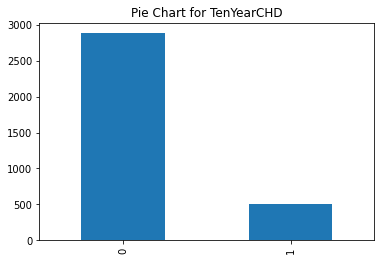

In [ ]:
#To get the pie Plot to analyze TenYearCHD
cardio_df["TenYearCHD"].value_counts().plot(kind="bar")
plt.title('Pie Chart for TenYearCHD')
plt.show()

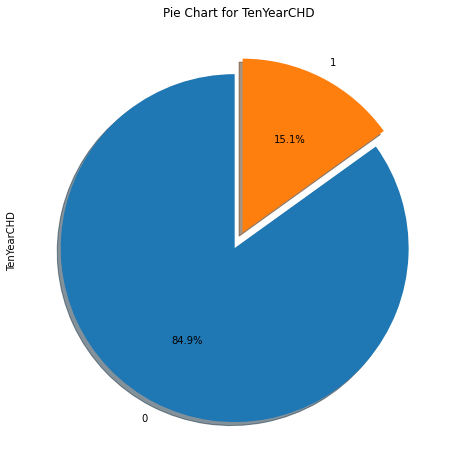

In [ ]:
#To get the pie Plot to analyze seasons
cardio_df["TenYearCHD"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for TenYearCHD')
plt.show()

From above analysis of target variabale "TenYearCHD" we observed that dataset is biased we need to carefully deal with biased dataset

In [ ]:
#renaming the TenYearCHD target feature
cardio_df.rename(columns={"TenYearCHD":"cardio_risk"},inplace=True)

In [ ]:
### Univarient analysis  of continuous variables
cardio_numerics_col = cardio_df.select_dtypes(include=np.number).columns.tolist()
print("numerical columns \n")
print(cardio_numerics_col)


numerical columns 

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cardio_risk']




### 1. Sex

In [ ]:
cardio_df["sex"].value_counts()

1    1923
0    1467
Name: sex, dtype: int64

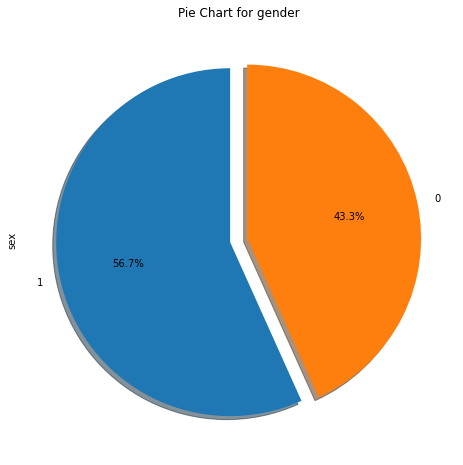

In [ ]:
cardio_df["sex"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for gender')
plt.show()

The dataset contain 43.3% of male data and remaining data belongs to female 

In [ ]:
cardio_df.groupby(["sex","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk     0    1
sex                   
0            1195  272
1            1684  239

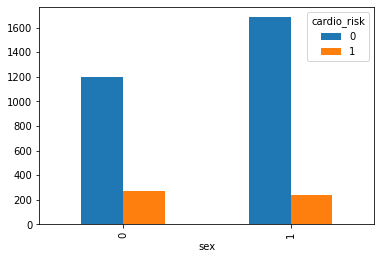

In [ ]:
# plotting graph for checking how many users are male or female and how it affects the target variable

pd.crosstab(cardio_df['sex'],cardio_df['cardio_risk']).plot(kind='bar')

In cimparison with male female less likely  to get cardiovascular risk

### 2. 'is_smoking'

In [ ]:
cardio_df["is_smoking"].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

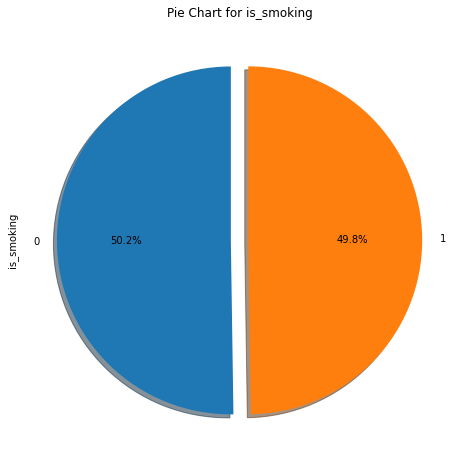

In [ ]:
cardio_df["is_smoking"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for is_smoking')
plt.show()

The data set contains almost same no of smokers and non smokers

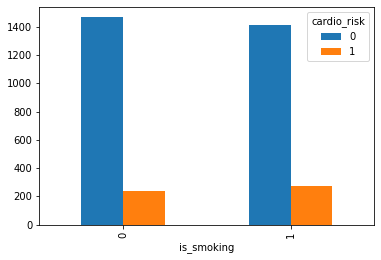

In [ ]:
# plotting graph for checking how many users are smoking or not and how it affects the target variable

pd.crosstab(cardio_df['is_smoking'],cardio_df['cardio_risk']).plot(kind='bar')

### Based on studies the smokers are 2 to 4 times more likely to get heart disease than nonsmokers.


**Based on analysis cardiovascular risk dataset,we observed that the smoking slightly more  effective for cardiovascular risk then non smoker.**

In [ ]:
cardio_df.groupby(["sex","is_smoking","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk        0    1
sex is_smoking           
0   0            467   89
    1            728  183
1   0           1000  147
    1            684   92

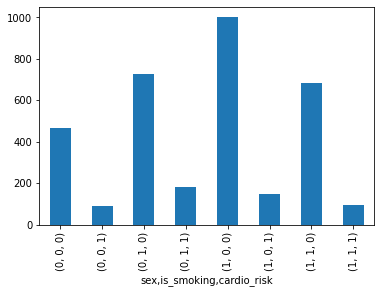

In [ ]:
cardio_df.groupby(["sex","is_smoking","cardio_risk"])["cardio_risk"].count().plot(kind='bar')

here we can observe that male who smoke has higher risk of having cardiovascular risk than female who smoke.

### cigsPerDay

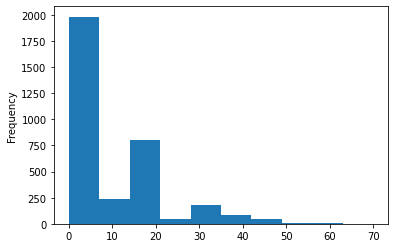

In [ ]:
cardio_df["cigsPerDay"].plot(kind="hist")

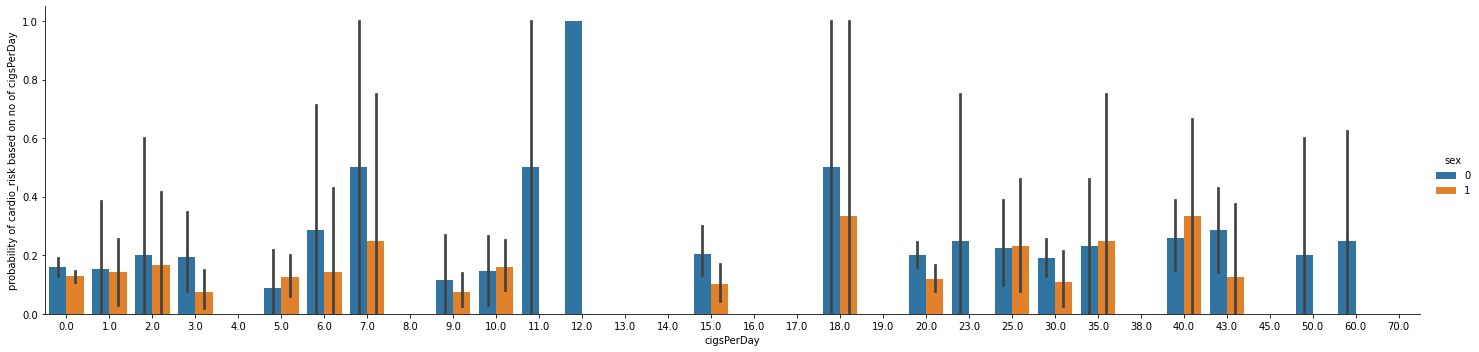

In [ ]:
# plotting graph for checking how no of cigrates per day used by person and how it affects the cardio_risk variable

g=sns.factorplot('cigsPerDay','cardio_risk',kind='bar',
                    data=cardio_df,hue='sex',aspect=4)

g=g.set_ylabels("probability of cardio_risk based on no of cigsPerDay")

As we observed that people who don't smoke or use cigsperday less than 6  has less chance having risk of cardiovascular problem.
But as no of cigsperday increases the cardiovascular risk also increase in males. females have less chance of in comparison with male.

### age

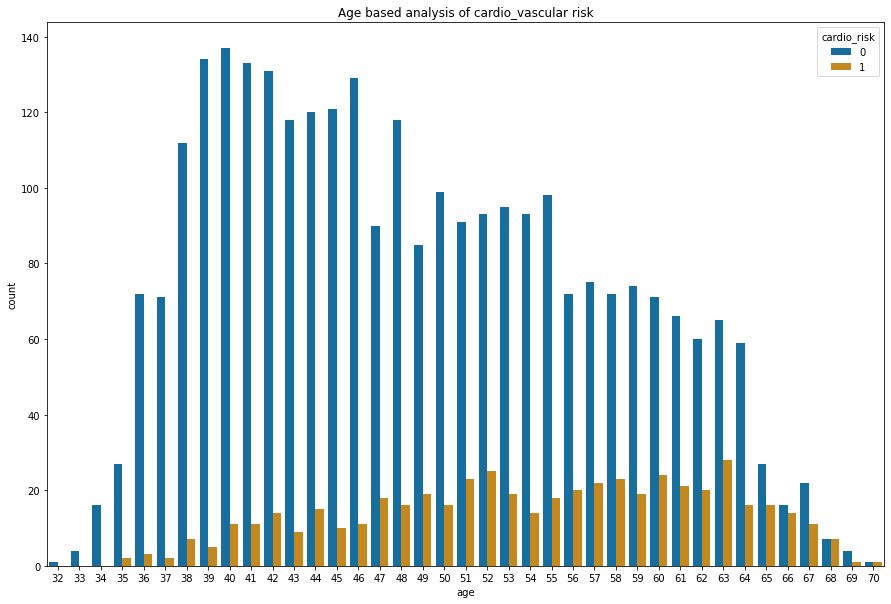

In [ ]:
# analyzing cardio_vascular risk over age 
plt.figure(figsize=[15,10])
plt.title("Age based analysis of cardio_vascular risk")
sns.countplot(x='age', hue='cardio_risk', data=cardio_df, palette='colorblind')


[Text(0.5, 1.0, ' Distribution cardio_risk over age and cigsPerDay ')]

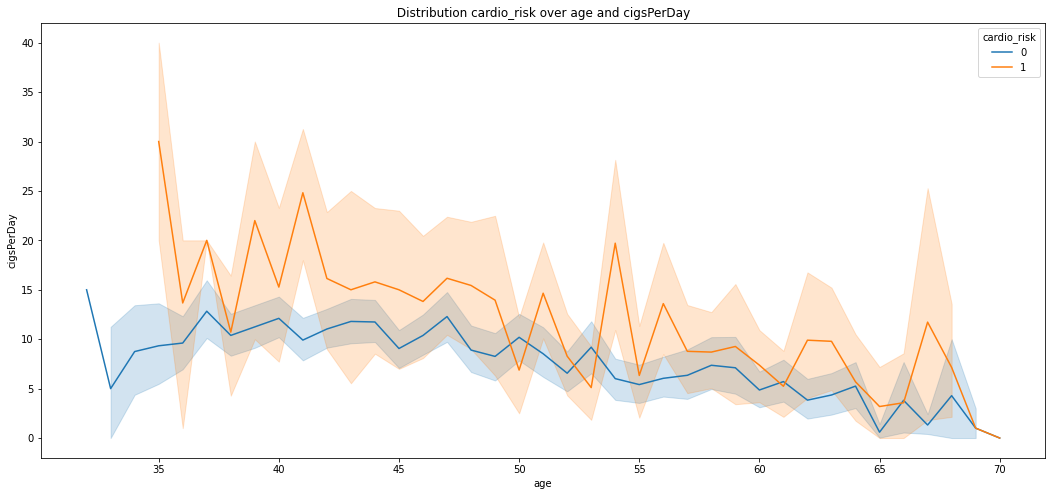

In [ ]:
#plotting line plot for understanding distribution cardio_risk over age and cigsPerDay
fig,ax=plt.subplots(figsize=(18,8))
sns.lineplot(data=cardio_df,x='age',y='cigsPerDay',hue='cardio_risk',ax=ax)
ax.set(title=' Distribution cardio_risk over age and cigsPerDay ')

we observed that the Number of people with cardiovascular disease  risk lesser than the number of people withhout cardiovascular disease risk.But people with age greater than the 40 has higher chance of having cardiovascular risk.

Age may matter for having higher chance but if the no. of cigrates per day decreases chance of having higher cardio_risk problem decreases.

lets convert the age feature into bins

In [ ]:
#perform data binning on points variable with specific quantiles and labels
bins = [30, 40, 50, 60, 70]
labels = ["30-40age","40-50age","50-60age","60-70age"]
cardio_df['binned_age'] = pd.cut(cardio_df['age'], bins=bins, labels=labels)
cardio_df.head()


id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  28.06       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   cardio_risk binned_age  
0            1   60-70age  
1            0   30-40age  
2            0   40-50age  
3            1   40-50age  
4            0   60-70age

In [ ]:
cardio_df['binned_age'] .value_counts()

40-50age    1283
50-60age    1041
30-40age     604
60-70age     462
Name: binned_age, dtype: int64

In [ ]:
cardio_df.groupby(["binned_age","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk     0    1
binned_age            
30-40age      574   30
40-50age     1144  139
50-60age      834  207
60-70age      327  135

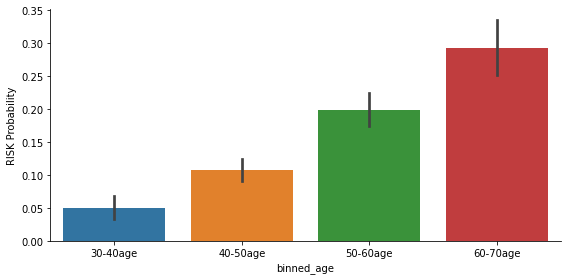

In [ ]:
# analyzing cardio_vascular risk over age 
ax=sns.factorplot('binned_age','cardio_risk',kind='bar', data=cardio_df,size=4,aspect=2)
ax=ax.set_ylabels("RISK Probability")


we observed from above analysis that people with age greater than 50 has higher chance of getting cardiovascular disease. 

In [ ]:
cardio_df.groupby(["binned_age","sex","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk       0    1
binned_age sex          
30-40age   0    262   17
           1    312   13
40-50age   0    483   81
           1    661   58
50-60age   0    331  108
           1    503   99
60-70age   0    119   66
           1    208   69

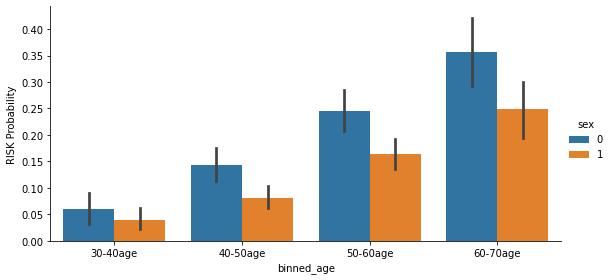

In [ ]:
# analyzing cardio_vascular risk over age 
ax=sns.factorplot('binned_age','cardio_risk',kind='bar',hue="sex", data=cardio_df,size=4,aspect=2)
ax=ax.set_ylabels("RISK Probability")

Based on our observation, as people get older the risk of getting cardiovascular disease iis high male in comarison with female.

### Education


In [ ]:
cardio_df["education"].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

we observed that the people who completed their eduction level 1 is higher incount, than people who completed level 2(intermediate) or level 3(graduates) or level 4(post graduate)

Text(0, 0.5, 'count')

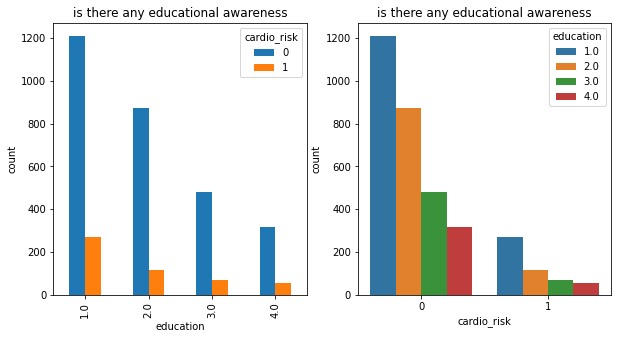

In [ ]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5)) 
cardio_df.groupby(["education","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk').plot(kind="bar",ax=ax[0])
ax[0].set_title('is there any educational awareness')
ax[0].set_ylabel('count')
# count plot of education levels people having diseases
sns.countplot(x ='cardio_risk', hue ='education', data = cardio_df,ax=ax[1])
ax[1].set_title('is there any educational awareness')
ax[1].set_ylabel('count')



Education of people not much effective in creating awareness to reduce cardio vascular risk.so we can drop this .



###'BPMeds' 
 we can say that people with blood pressure medication

In [ ]:
cardio_df["BPMeds"].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

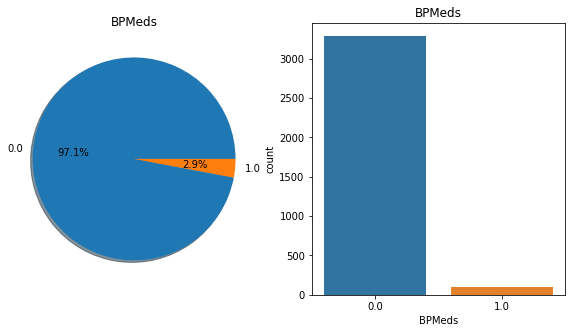

In [ ]:
#Plotting pie chart of BPMeds variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['BPMeds'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('BPMeds')
ax[0].set_ylabel('')
sns.countplot('BPMeds',data=cardio_df,ax=ax[1])
ax[1].set_title('BPMeds')
plt.show()


In [ ]:
cardio_df.groupby(["BPMeds","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk     0    1
BPMeds                
0.0          2812  478
1.0            67   33

Text(0.5, 1.0, 'BPMeds')

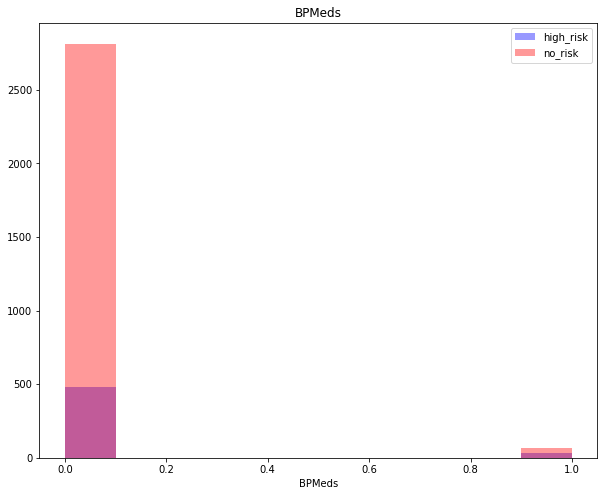

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].BPMeds,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].BPMeds,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('BPMeds')

#### People who is under madication has nearly 50%  chance of getting cardiovascular disease

### **PrevalentStroke**

It deal with  whether or not the patient had previously had a stroke

In [ ]:
cardio_df["prevalentStroke"].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

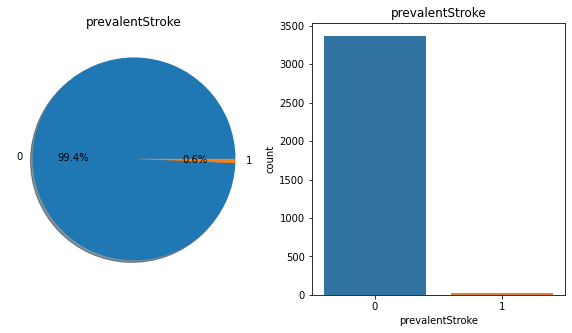

In [ ]:
#Plotting pie chart of prevalentStroke variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['prevalentStroke'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('prevalentStroke')
ax[0].set_ylabel('')
sns.countplot('prevalentStroke',data=cardio_df,ax=ax[1])
ax[1].set_title('prevalentStroke')
plt.show()


In [ ]:
cardio_df.groupby(["prevalentStroke","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk         0    1
prevalentStroke           
0                2867  501
1                  12   10

Text(0.5, 1.0, 'prevalentStroke')

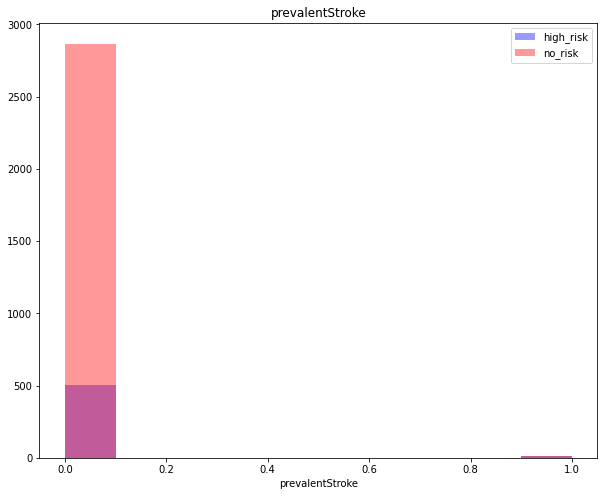

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].prevalentStroke,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].prevalentStroke,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('prevalentStroke')

Even if patient has got stroke earlier there is 40-50% chance getting cardiovascular disease risk. 
# we can drop this feature

### PrevalentHyp

In [ ]:
cardio_df["prevalentHyp"].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

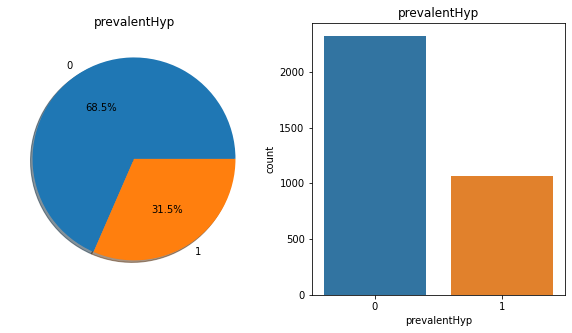

In [ ]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['prevalentHyp'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('prevalentHyp')
ax[0].set_ylabel('')
sns.countplot('prevalentHyp',data=cardio_df,ax=ax[1])
ax[1].set_title('prevalentHyp')
plt.show()

In [ ]:
cardio_df.groupby(["prevalentHyp","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk      0    1
prevalentHyp           
0             2065  256
1              814  255

Text(0.5, 1.0, 'prevalentHyp')

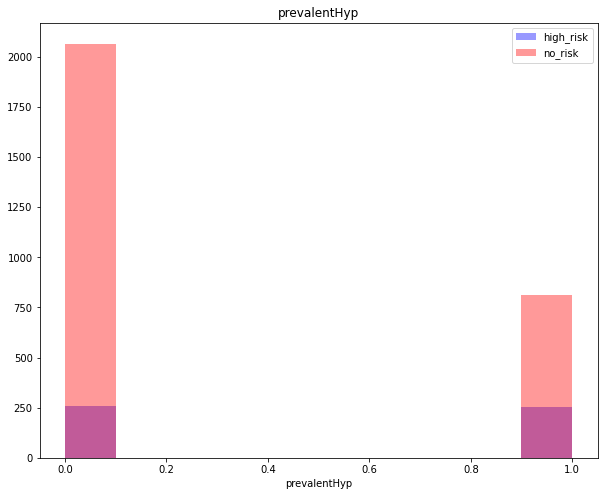

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].prevalentHyp,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].prevalentHyp,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('prevalentHyp')

## 'diabetes'

In [ ]:
cardio_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

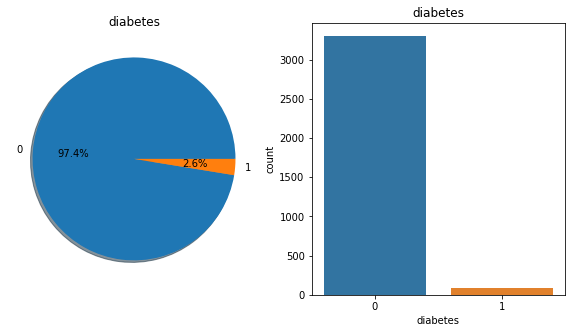

In [ ]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diabetes')
ax[0].set_ylabel('')
sns.countplot('diabetes',data=cardio_df,ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

In [ ]:
cardio_df.groupby(['diabetes',"cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk     0    1
diabetes              
0            2825  478
1              54   33

Text(0.5, 1.0, 'diabetes')

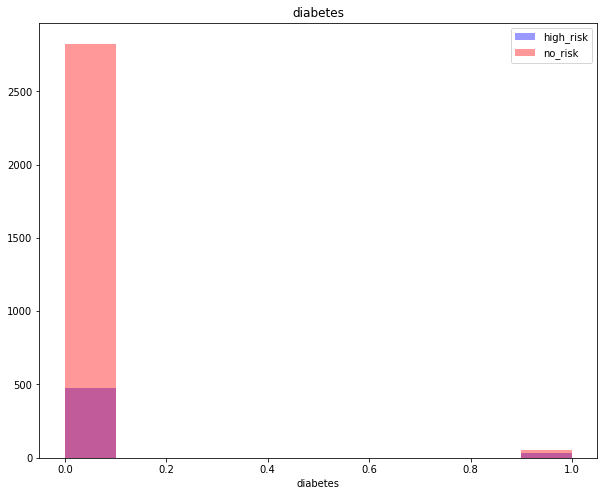

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].diabetes,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].diabetes,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('diabetes')

### totChol

In [ ]:
cardio_df['totChol'].value_counts()

240.0    66
210.0    53
220.0    48
260.0    47
232.0    45
         ..
331.0     1
137.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

Text(0.5, 1.0, 'totChol')

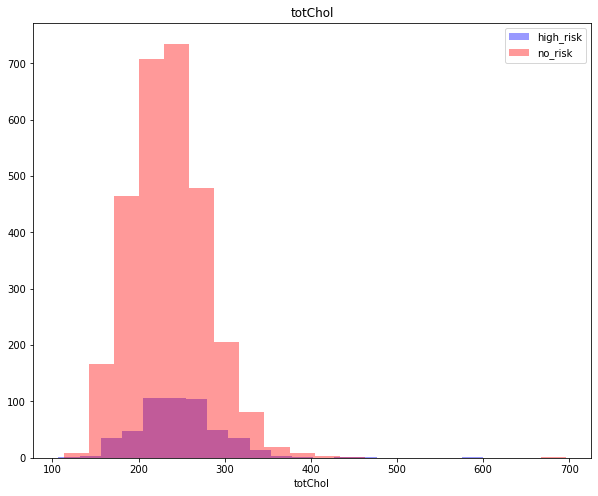

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].totChol,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].totChol,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('totChol')

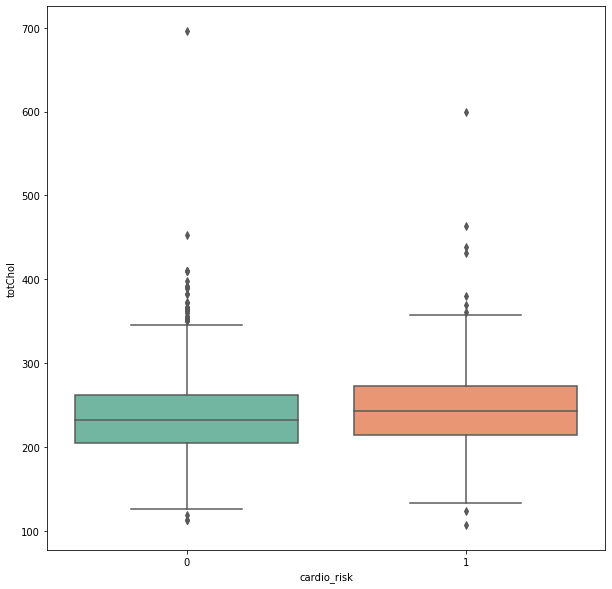

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and totChol
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="totChol", data=cardio_df,palette="Set2")

### BMI

In [ ]:
cardio_df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
25.09    12
23.48    12
         ..
19.25     1
30.71     1
36.65     1
31.18     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

Text(0.5, 1.0, 'BMI')

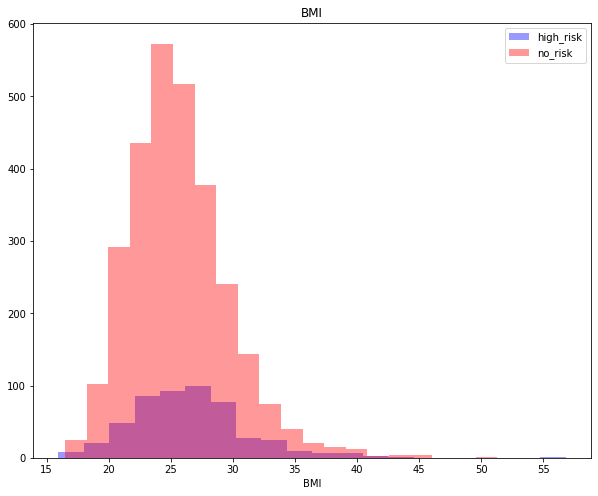

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].BMI,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].BMI,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('BMI')


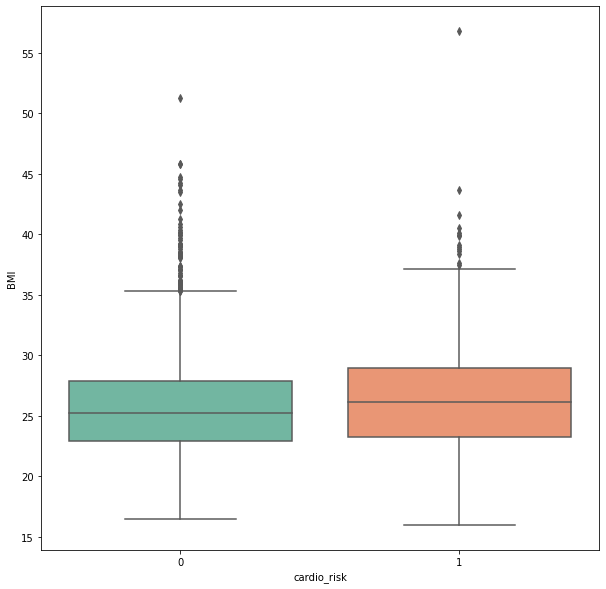

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and BMI
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="BMI", data=cardio_df,palette="Set2")

### HeartRate

In [ ]:
cardio_df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

Text(0.5, 1.0, 'heartRate')

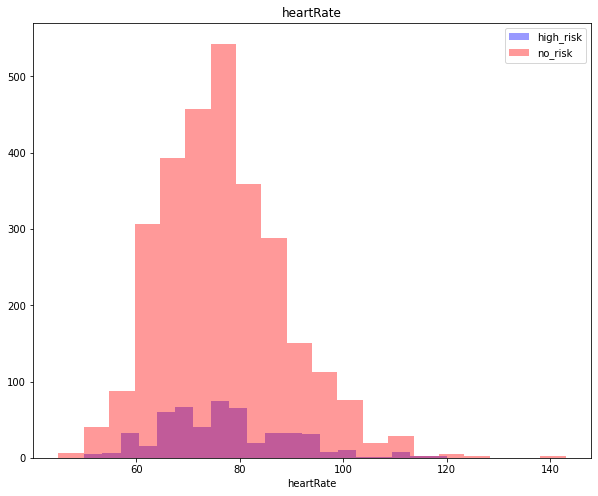

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].heartRate,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].heartRate,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('heartRate')


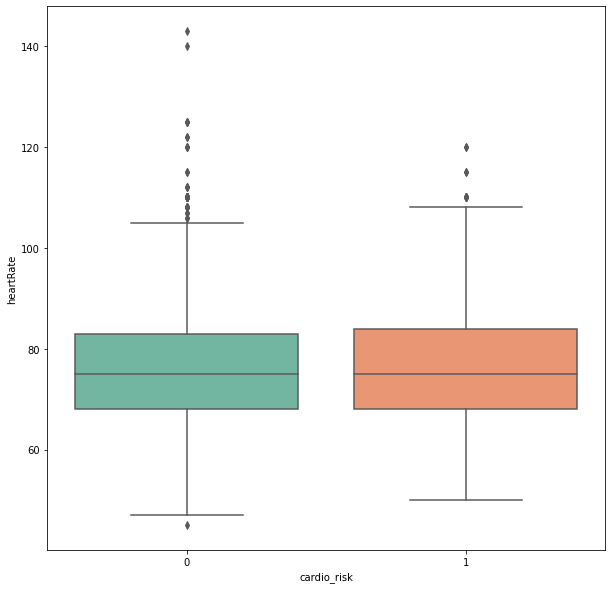

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and heartrate
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="heartRate", data=cardio_df,palette="Set2")

### Glucose

In [ ]:
cardio_df['glucose'].value_counts()

75.0     164
83.0     151
70.0     134
77.0     131
85.0     130
        ... 
191.0      1
244.0      1
256.0      1
145.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

Text(0.5, 1.0, 'glucose')

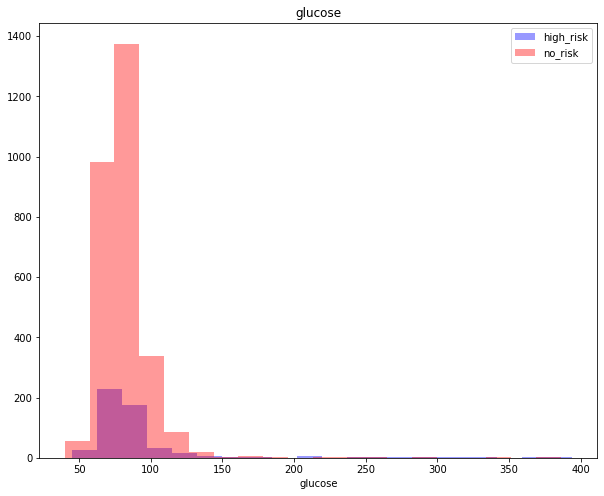

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].glucose,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].glucose,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('glucose')


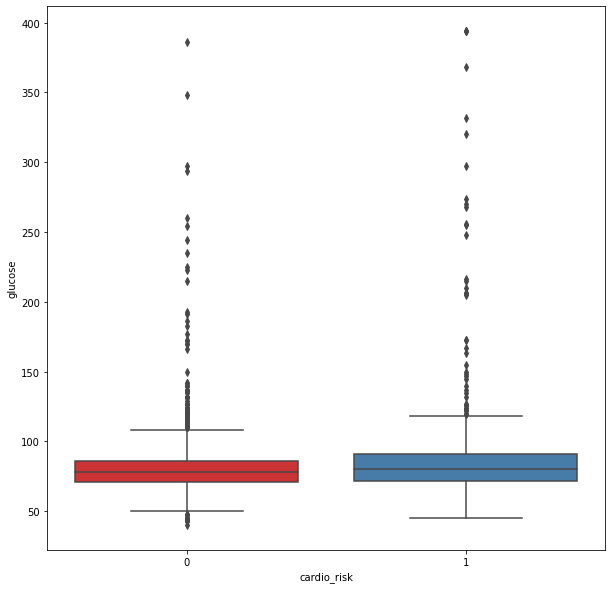

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and glucose
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="glucose", data=cardio_df,palette="Set1")

### sysBP

In [ ]:
cardio_df['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

Text(0.5, 1.0, 'sysBP')

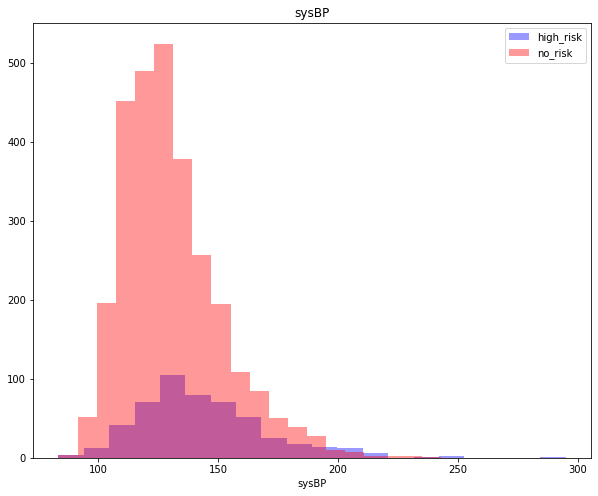

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].sysBP,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].sysBP,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('sysBP')

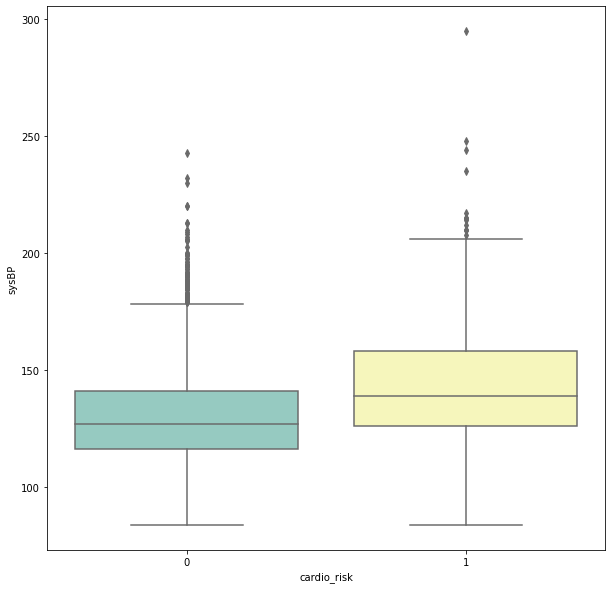

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and sysBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="sysBP", data=cardio_df,palette="Set3")

### diaBP

In [ ]:
cardio_df['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

Text(0.5, 1.0, 'diaBP')

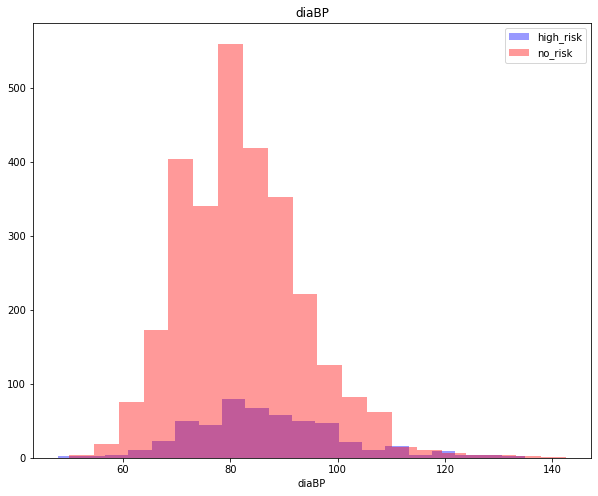

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].diaBP,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].diaBP,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('diaBP')

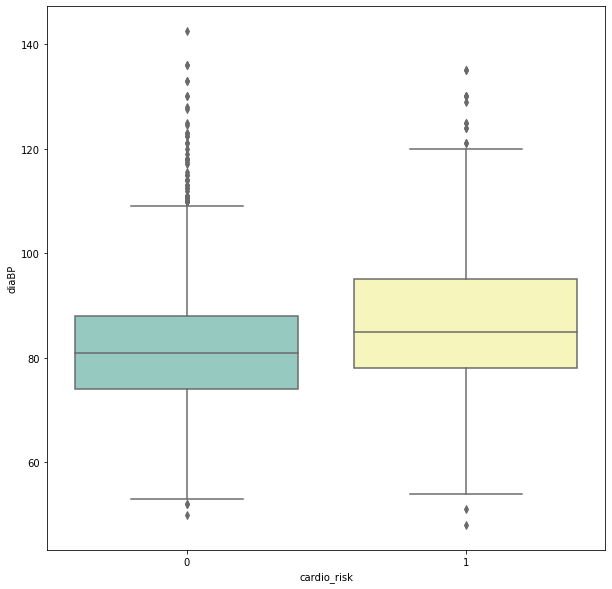

In [ ]:
#plotting the box plot to vizualize the data distribution of cardio_risk and diaBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="diaBP", data=cardio_df,palette="Set3")

In [ ]:
#droping columns which doesnot add value to following process
cardio_df.drop(columns=["binned_age","id"],axis=1,inplace=True)

### Outlier/Anamoly detection

In [ ]:
### Univarient analysis  of continuous variables
# Lets check the discrete and continuous features
categorical_features = [i for i in cardio_df.columns if cardio_df[i].nunique()<=10]
continuous_features = [i for i in cardio_df.columns if i not in categorical_features and i!="id"]
print("continuous feature columns \n")
print(continuous_features)


continuous feature columns 

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


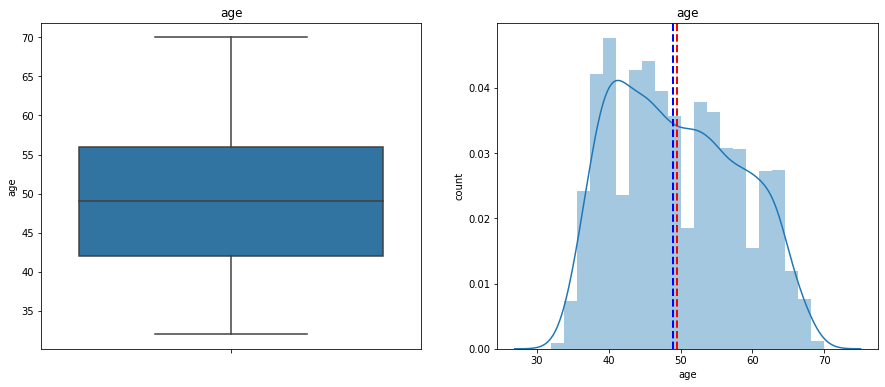

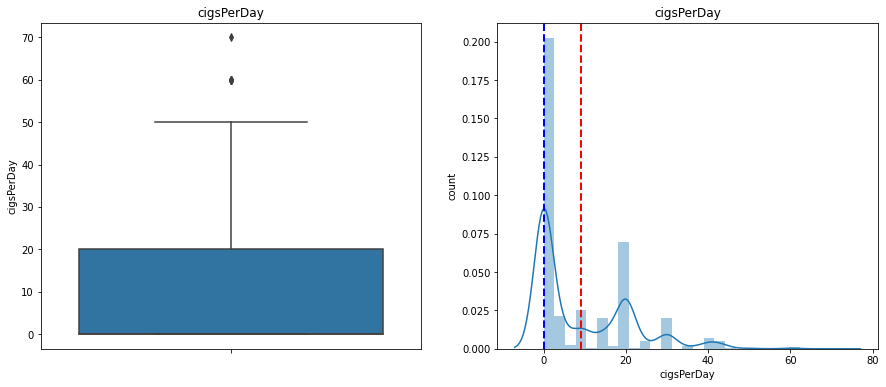

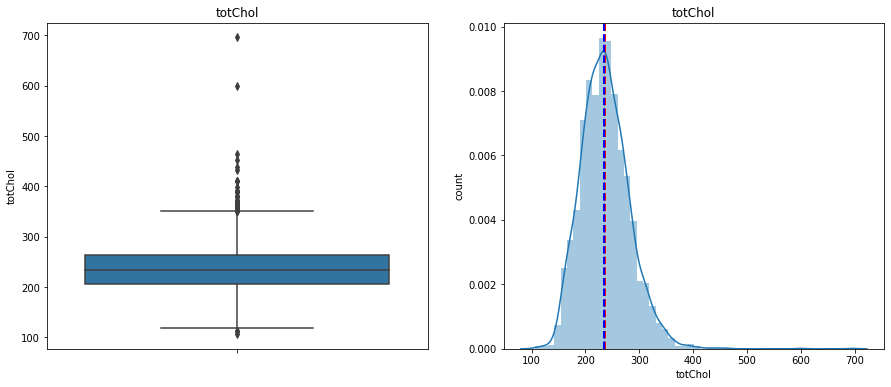

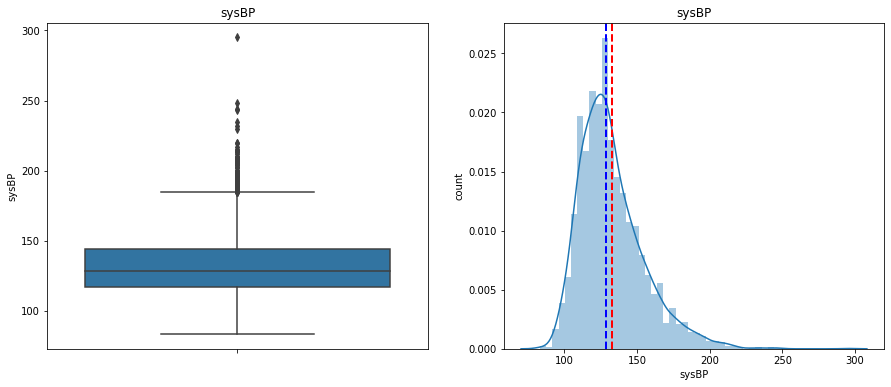

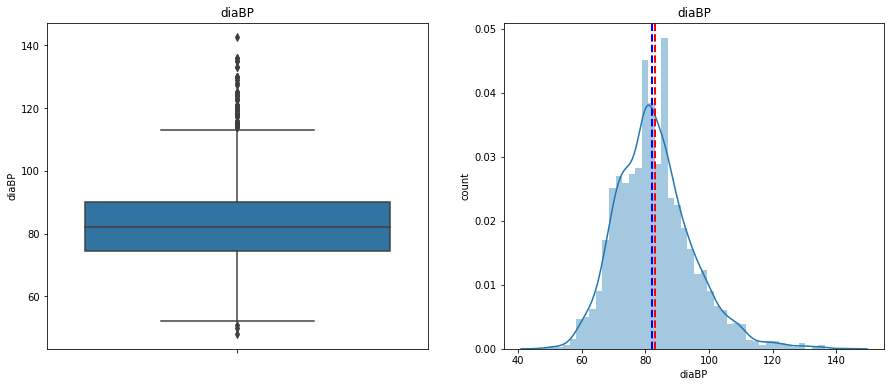

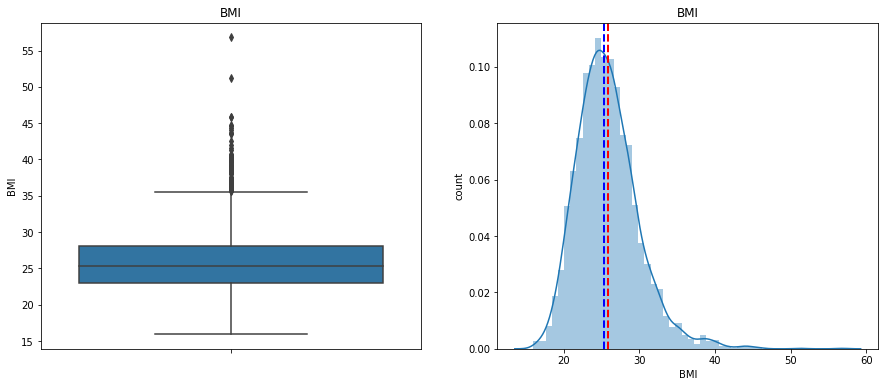

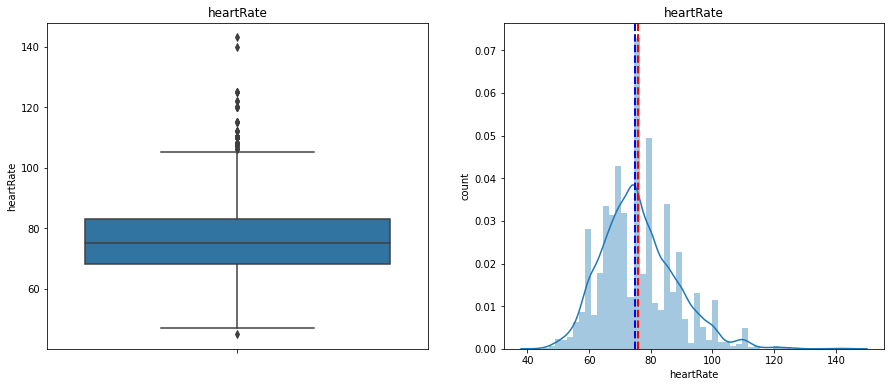

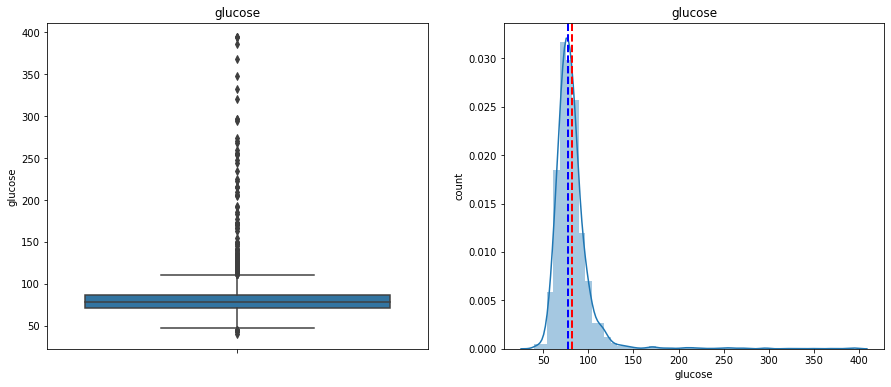

In [ ]:
#ploting boxplot and distplot to check data distribution of each numerical column
for var in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=cardio_df[var])
    fig.set_title(var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(cardio_df[var])
    plt.axvline(cardio_df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(cardio_df[var].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(var)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
#checking skewness of each feature
print("skewness of the numerical column distribution is as follows:\n")
for var in continuous_features:
     print(f'{var} has skewness ...........  {round(cardio_df[var].skew(),3)}')

skewness of the numerical column distribution is as follows:

age has skewness ...........  0.226
cigsPerDay has skewness ...........  1.221
totChol has skewness ...........  0.927
sysBP has skewness ...........  1.176
diaBP has skewness ...........  0.718
BMI has skewness ...........  1.027
heartRate has skewness ...........  0.676
glucose has skewness ...........  6.258


here we observed that the glucose feature suffer from skewness i.e that occured due to precence of outliers. But we cannot drop these outlier because some people may has got high level of glucose  this may increase their cardiovascular problem.

feature with outliers:

In [ ]:
feature_with_outlier=["BMI","heartRate","glucose","diaBP","sysBP","totChol","cigsPerDay"]

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
for col in feature_with_outlier:
  # Using IQR method to define the range of inliners:
  q1, q3, median = cardio_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  cardio_df[col] = np.where(cardio_df[col] > upper_limit, median,np.where(cardio_df[col] < lower_limit,median,cardio_df[col]))

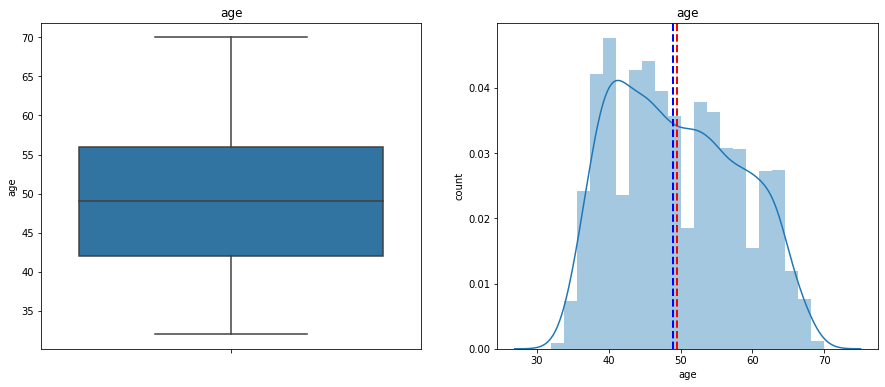

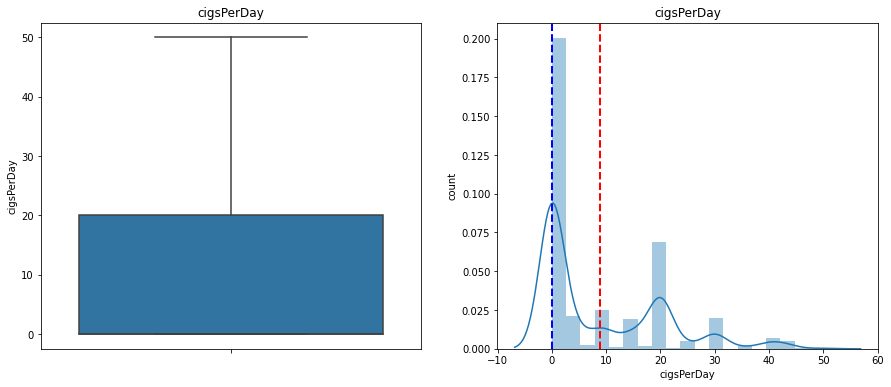

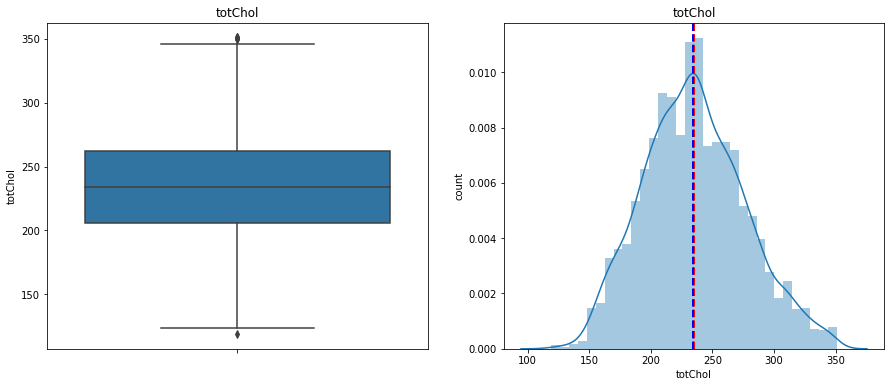

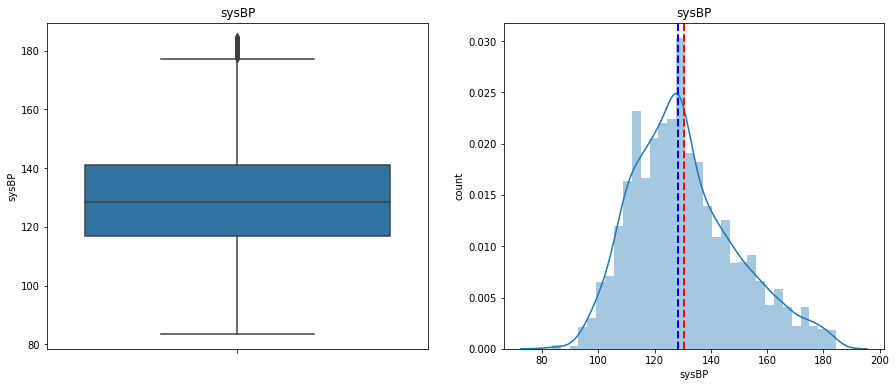

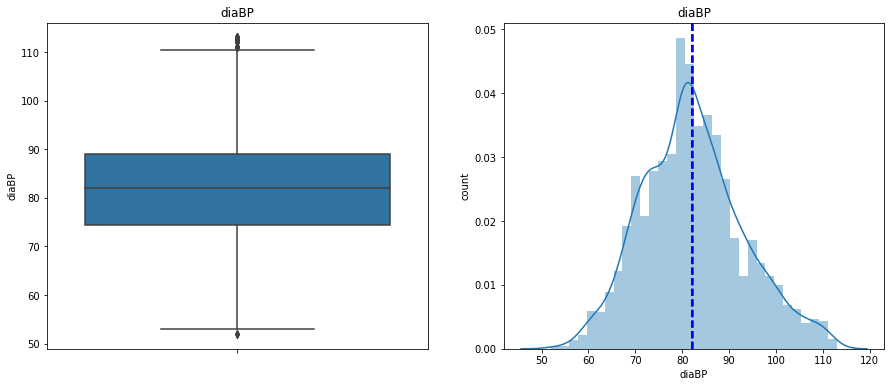

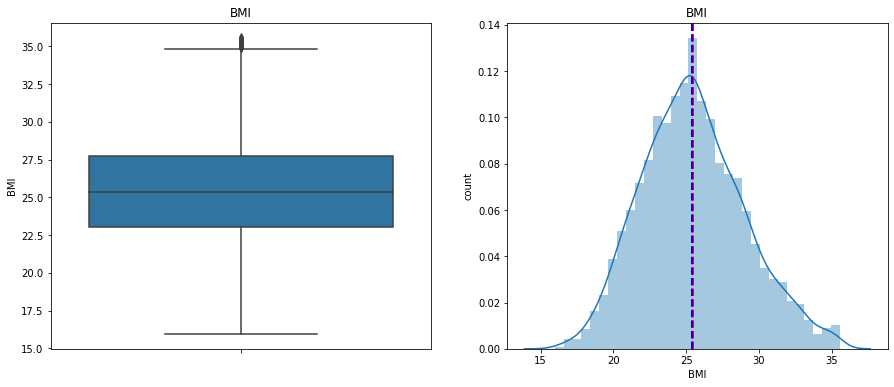

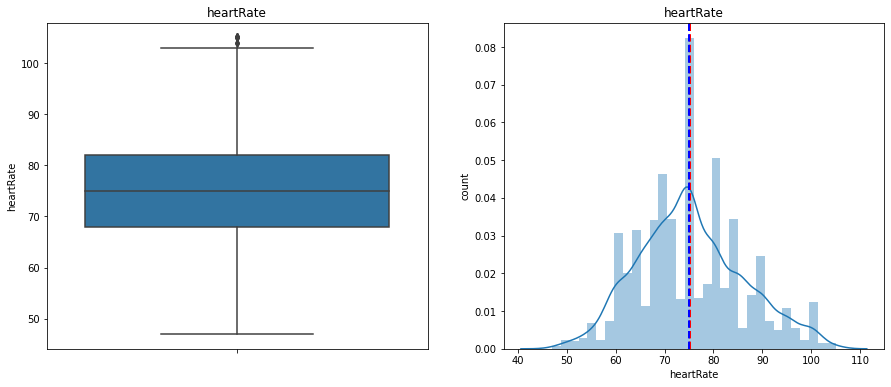

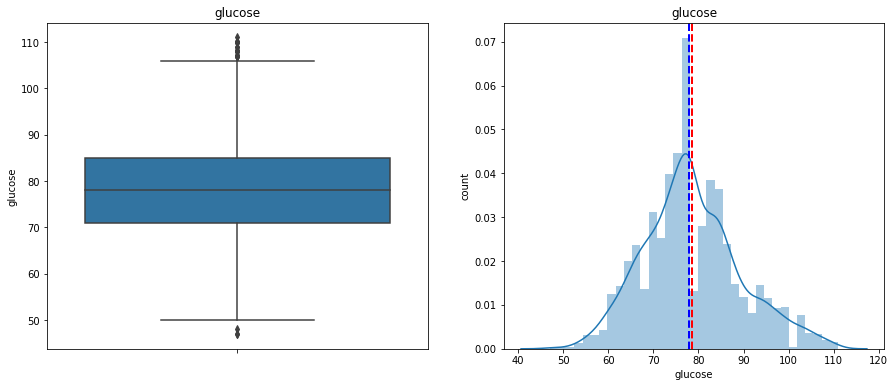

In [ ]:
#ploting boxplot and distplot to check data distribution of each numerical column after outlier treatment
for var in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=cardio_df[var])
    fig.set_title(var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(cardio_df[var])
    plt.axvline(cardio_df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(cardio_df[var].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(var)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
#checking skewness of each feature after outlier treatment
print("skewness of the numerical column distribution is as follows:\n")
for var in continuous_features:
     print(f'{var} has skewness ...........  {round(cardio_df[var].skew(),3)}')

skewness of the numerical column distribution is as follows:

age has skewness ...........  0.226
cigsPerDay has skewness ...........  1.116
totChol has skewness ...........  0.238
sysBP has skewness ...........  0.59
diaBP has skewness ...........  0.3
BMI has skewness ...........  0.294
heartRate has skewness ...........  0.288
glucose has skewness ...........  0.365


checking multicolinearity between all independent feature and target variable

1.Using pair plot

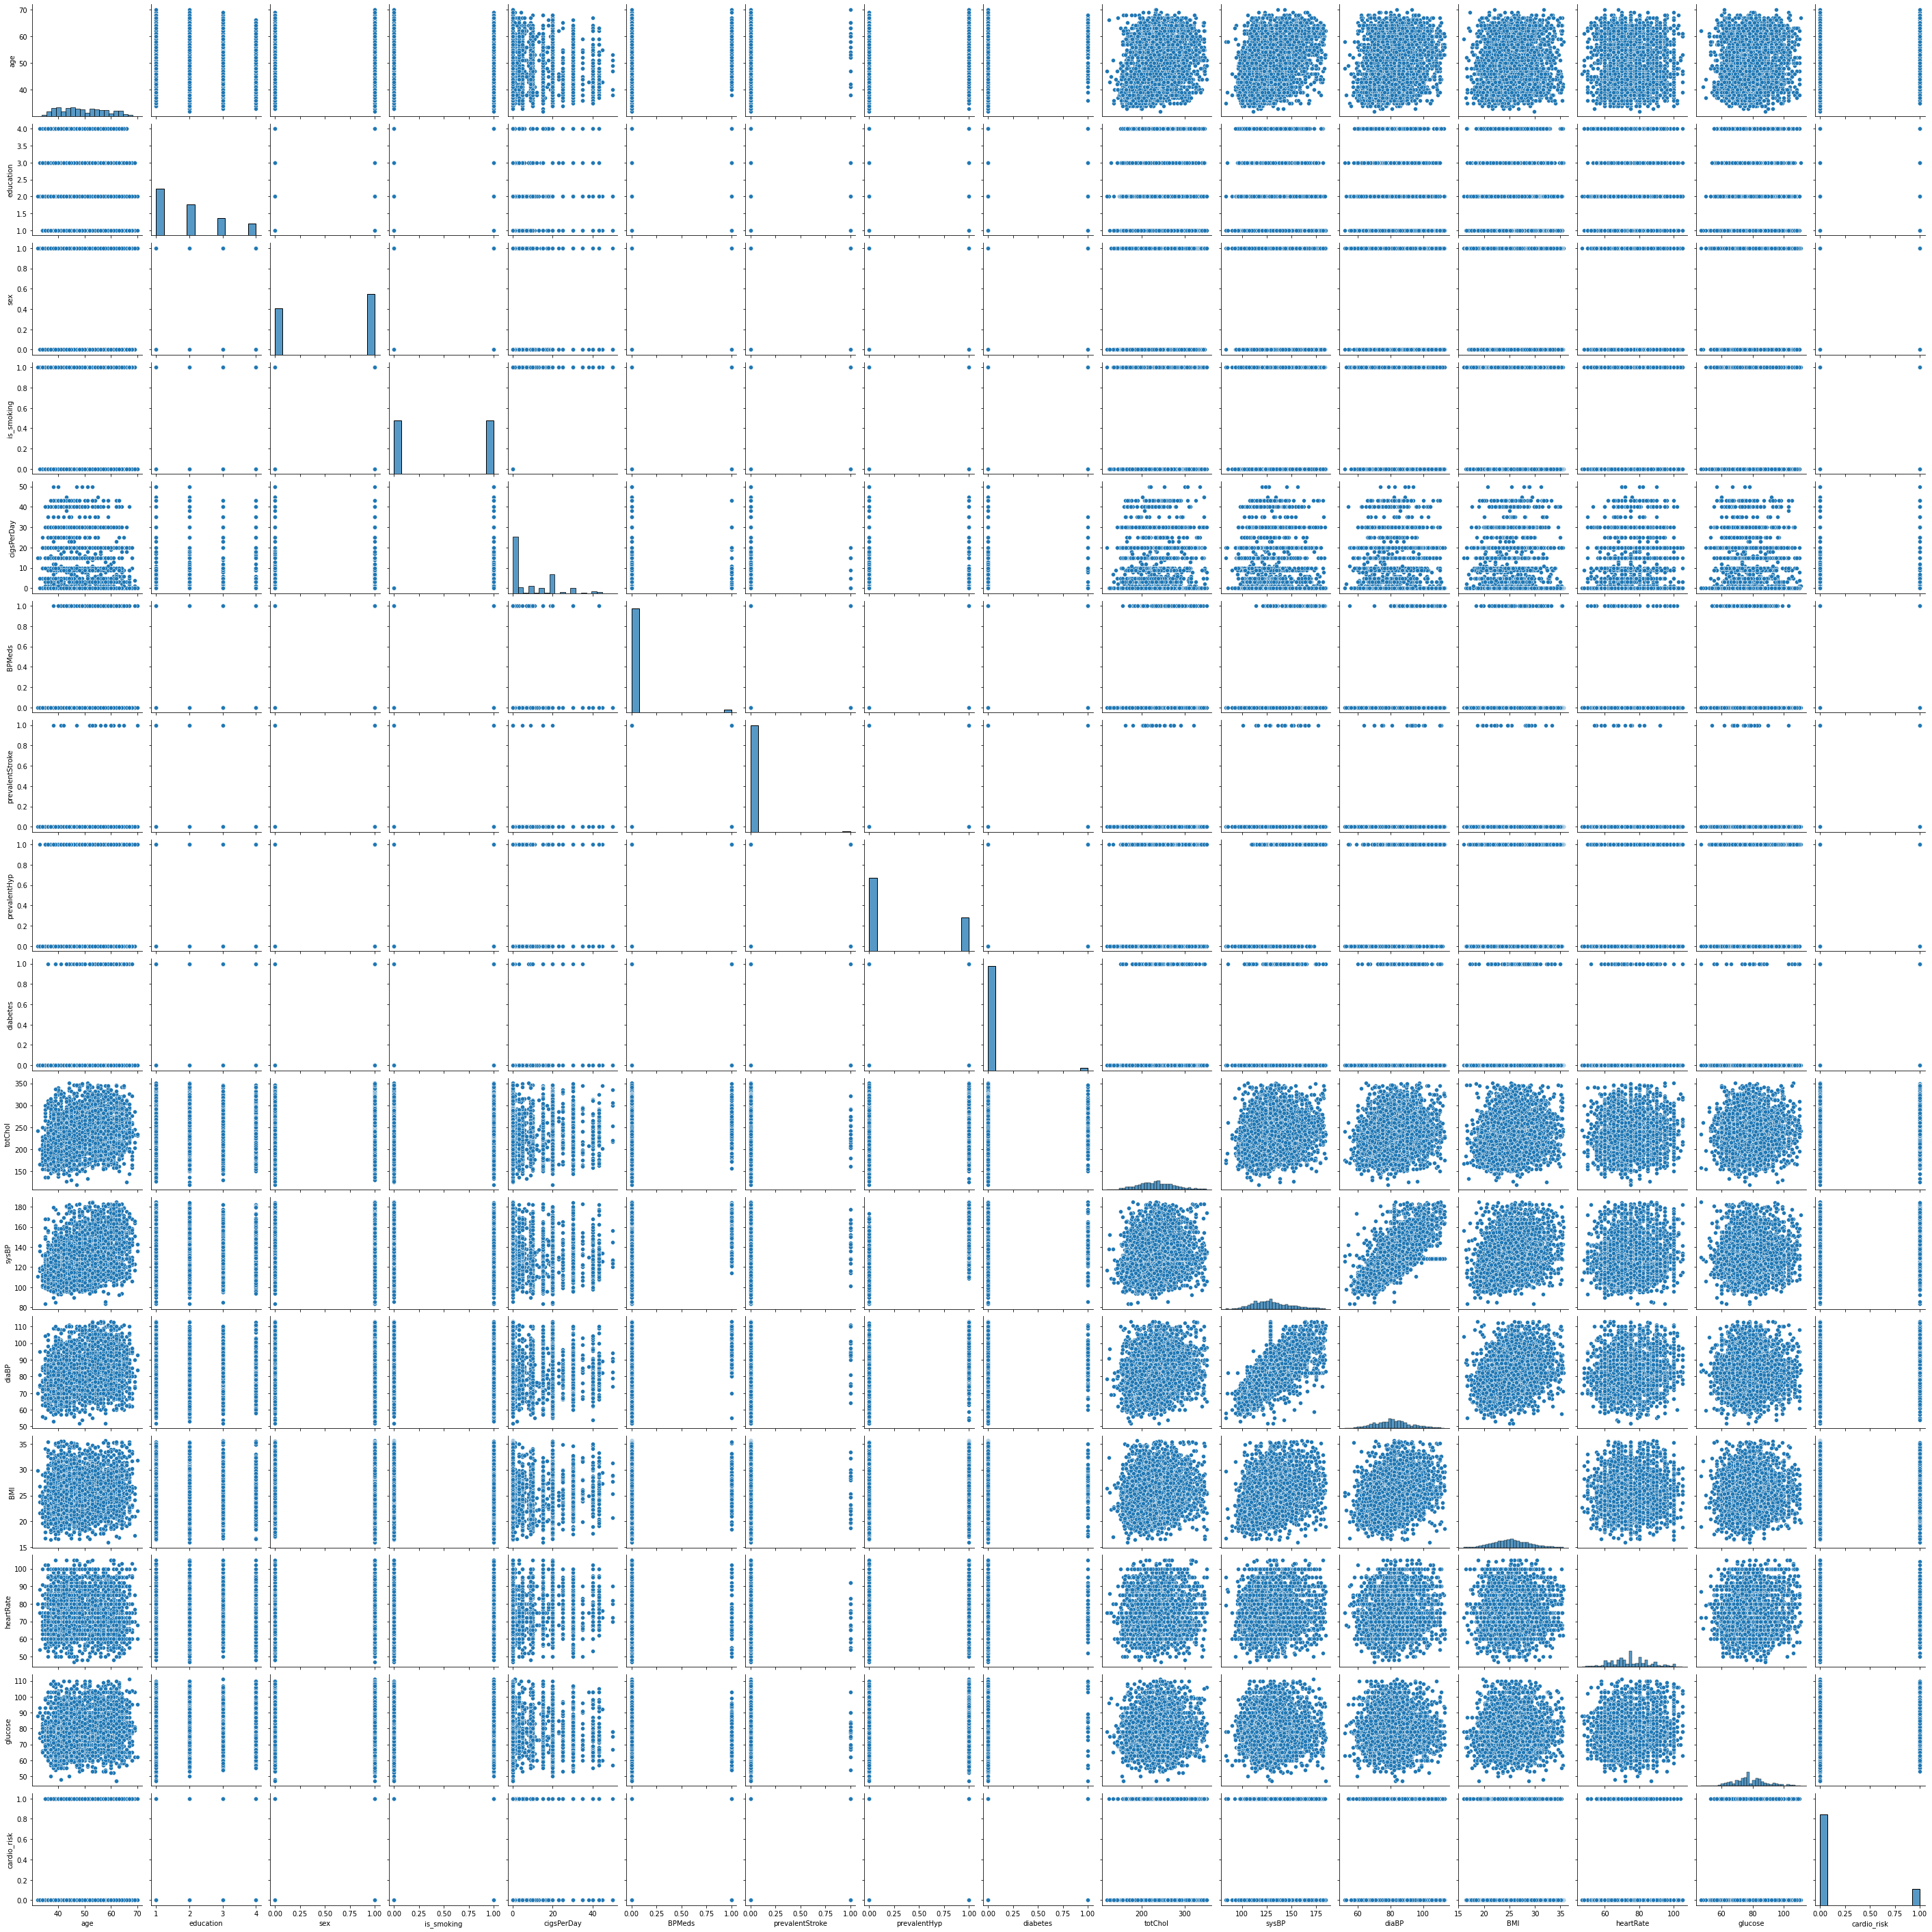

In [ ]:
#pairplot
sns.pairplot(cardio_df)

In [ ]:
##drop feature education
cardio_df.drop(columns=["education"],axis=1,inplace=True)

2.using correlation metrics

In [ ]:
#correlation matrix for each numerical feature using ".corr()"
corr_matrix= round(cardio_df.corr(),3)
corr_matrix

age    sex  is_smoking  cigsPerDay  BPMeds  \
age              1.000  0.042      -0.211      -0.196   0.122   
sex              0.042  1.000      -0.215      -0.321   0.043   
is_smoking      -0.211 -0.215       1.000       0.774  -0.038   
cigsPerDay      -0.196 -0.321       0.774       1.000  -0.035   
BPMeds           0.122  0.043      -0.038      -0.035   1.000   
prevalentStroke  0.059  0.011      -0.044      -0.042   0.116   
prevalentHyp     0.309 -0.003      -0.119      -0.085   0.257   
diabetes         0.108 -0.009      -0.053      -0.048   0.071   
totChol          0.279  0.062      -0.051      -0.024   0.079   
sysBP            0.369 -0.001      -0.136      -0.090   0.188   
diaBP            0.208 -0.078      -0.123      -0.067   0.168   
BMI              0.127 -0.151      -0.173      -0.099   0.065   
heartRate       -0.009  0.116       0.071       0.072  -0.012   
glucose          0.080  0.023      -0.079      -0.083  -0.027   
cardio_risk      0.225 -0.085       0.034       0.064   0.087   

                 prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  \
age                        0.059         0.309     0.108    0.279  0.369   
sex                        0.011        -0.003    -0.009    0.062 -0.001   
is_smoking                -0.044        -0.119    -0.053   -0.051 -0.136   
cigsPerDay                -0.042        -0.085    -0.048   -0.024 -0.090   
BPMeds                     0.116         0.257     0.071    0.079  0.188   
prevalentStroke            1.000         0.072     0.010    0.003  0.054   
prevalentHyp               0.072         1.000     0.083    0.146  0.672   
diabetes                   0.010         0.083     1.000    0.043  0.071   
totChol                    0.003         0.146     0.043    1.000  0.182   
sysBP                      0.054         0.672     0.071    0.182  1.000   
diaBP                      0.057         0.593     0.060    0.171  0.714   
BMI                       -0.006         0.255     0.054    0.145  0.278   
heartRate                 -0.016         0.130     0.029    0.071  0.139   
glucose                   -0.013         0.063     0.007    0.029  0.069   
cardio_risk                0.069         0.167     0.104    0.088  0.166   

                 diaBP    BMI  heartRate  glucose  cardio_risk  
age              0.208  0.127     -0.009    0.080        0.225  
sex             -0.078 -0.151      0.116    0.023       -0.085  
is_smoking      -0.123 -0.173      0.071   -0.079        0.034  
cigsPerDay      -0.067 -0.099      0.072   -0.083        0.064  
BPMeds           0.168  0.065     -0.012   -0.027        0.087  
prevalentStroke  0.057 -0.006     -0.016   -0.013        0.069  
prevalentHyp     0.593  0.255      0.130    0.063        0.167  
diabetes         0.060  0.054      0.029    0.007        0.104  
totChol          0.171  0.145      0.071    0.029        0.088  
sysBP            0.714  0.278      0.139    0.069        0.166  
diaBP            1.000  0.318      0.150    0.031        0.109  
BMI              0.318  1.000      0.050    0.046        0.054  
heartRate        0.150  0.050      1.000    0.075        0.013  
glucose          0.031  0.046      0.075    1.000        0.024  
cardio_risk      0.109  0.054      0.013    0.024        1.000

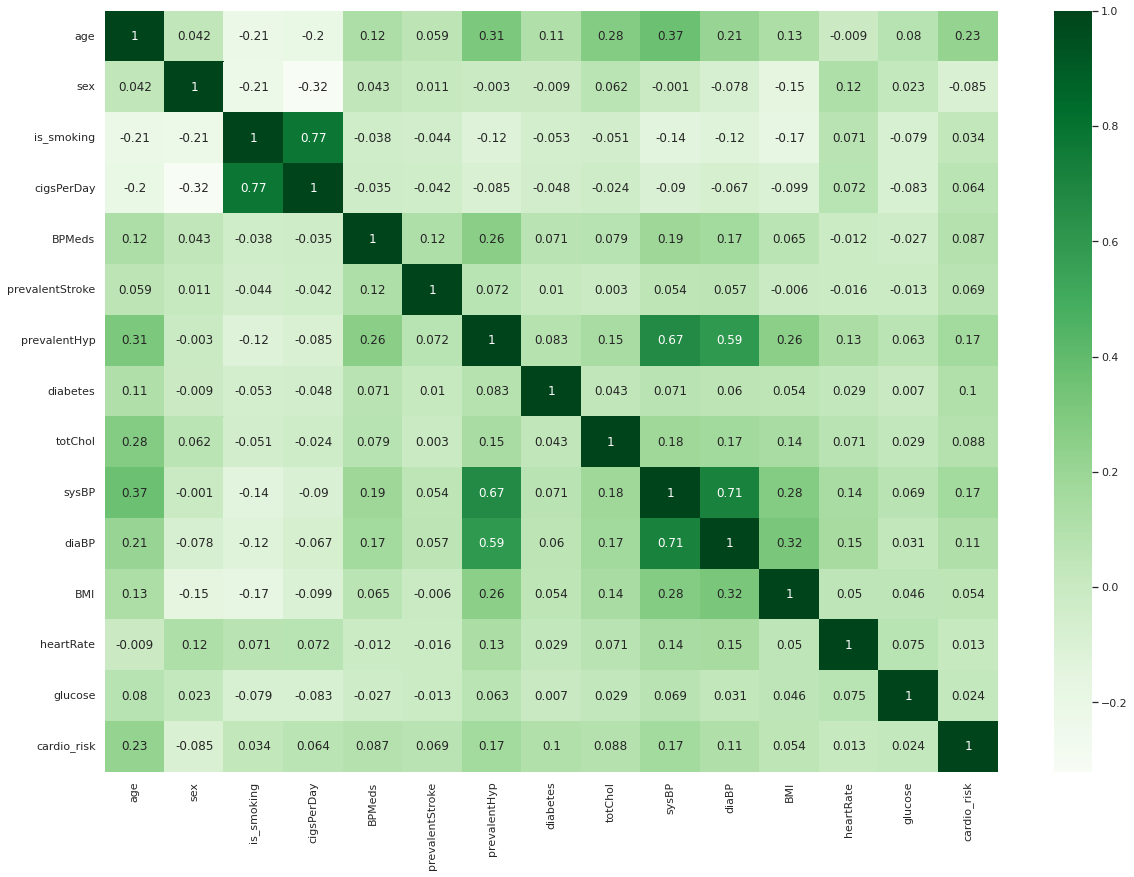

In [ ]:
#visualization using heatmap
sns.set(rc={'figure.figsize':(20,14)})
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [ ]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            print(abs(corr_matrix.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.774 -- 3 -- 2 -- cigsPerDay -- is_smoking
0.714 -- 10 -- 9 -- diaBP -- sysBP


#### **👉Here we can see that glucose,heartrate are not significantly correlated with cardio risk. so  we can drop these feature.**
### **👉cigsPerDay -- is_smoking  where cigsPerDay- no of cigrates per day and is_smoking - is smoking are highly correlated with each other** 


###**👉"diaBP" and "sysBP" are highly correlated**
where
diaBP is Diastolic Pressure
sysBP is Systolic Pressure


### What is VIF?
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:

👉 1 = not correlated.

👉 Between 1 and 5 = moderately correlated.

👉 Greater than 5 = highly correlated.


 from above analysis cigsPerDay and is_smoking is highly correlated with each other and diaBP and  sysBP are also highly correlated with each other

In [ ]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [ ]:
#applying vif for each feature
#Calc_vif(cardio_df[[i for i in cardio_df.describe().columns if i not in ["glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]])
calc_vif(cardio_df[[i for i in cardio_df.describe().columns if i not in ["cardio_risk"," ","diaBP","sysBP","glucose","heartRate","totChol","BMI"]]])#"diaBP","sysBP","40-50age","BMI"]]])

variables       VIF
0       is_smoking  4.901518
1              age  4.434806
2       cigsPerDay  4.195532
3              sex  2.452995
4     prevalentHyp  1.688569
5           BPMeds  1.119134
6         diabetes  1.043116
7  prevalentStroke  1.024257

In [ ]:
#correlation matrix for each numerical feature using ".corr()"
#corr_matrix= round(cardio_df[[i for i in cardio_df.describe().columns if i not in ["glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]].corr(),3)
#corr_matrix

In [ ]:
#visualization using heatmap
#sns.set(rc={'figure.figsize':(20,14)})
#matrix = np.triu(corr_matrix)
#sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [ ]:
#independent feature after removal of multicolliniarity of the data
#features=[i for i in cardio_df.describe().columns if i not in ["cardio_risk","glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]
#print(features)       

features=[i for i in cardio_df.describe().columns if i not in["cardio_risk","diaBP","sysBP","glucose","heartRate","totChol","BMI"]]
print(features)

['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


#logistic regression 

###Data preprocessing for logistic model


In [ ]:
#separating dependent and independent variables

X=cardio_df[features]
y=cardio_df["cardio_risk"]

In [ ]:
## Test-Train Split of Input Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=4)
print((X_train.shape,  y_train.shape),(y_test.shape,X_test.shape))

((2712, 8), (2712,)) ((678,), (678, 8))


**What is Standardization?**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
#using standardization
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#creating dictionary for storing different models accuracy
model_comparison={}

###  Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [ ]:
# Checking Value counts for both classes Before 
print("Before Handling Class Imbalace:")
y_train.value_counts()

Before Handling Class Imbalace:


0    2291
1     421
Name: cardio_risk, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)

#fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Checking Value counts for both classes After handling Class Imbalance:
print("after  Handling Class Imbalace:")
y_smote.value_counts()

after  Handling Class Imbalace:


0    2291
1    2291
Name: cardio_risk, dtype: int64

## **Building logistic regression model** 

In [ ]:
# Fitting Logistic Regression Model
log_reg_clf_model= LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg_clf_model.fit(X_smote,y_smote)
y_pred = log_reg_clf_model.predict(X_test)

### Since dataset is balanced we use accuracy metric

In [ ]:
#for train data
print(f"Using logistic regression we get an accuracy of train set{round(((accuracy_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an precision of train set {round(((precision_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an recall score of train set {round(((recall_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an f1 of train set {round(((f1_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")


print("\n")
#for test data

print(f"Using logistic regression we get an accuracy of {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")


Using logistic regression we get an accuracy of train set67.33%
Using logistic regression we get an precision of train set 67.1%
Using logistic regression we get an recall score of train set 68.01%
Using logistic regression we get an f1 of train set 67.55%
Using logistic regression we get an roc_auc_score of train set 67.33%


Using logistic regression we get an accuracy of 64.9%
Using logistic regression we get an precision of test set 21.97%
Using logistic regression we get an recall score of test set 64.44%
Using logistic regression we get an f1 of test set 32.77%
Using logistic regression we get an roc_auc_score of test set 64.71%


In [ ]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       588
           1       0.22      0.64      0.33        90

    accuracy                           0.65       678
   macro avg       0.57      0.65      0.55       678
weighted avg       0.83      0.65      0.70       678



Text(0.5, 1.0, 'logistic regression Report')

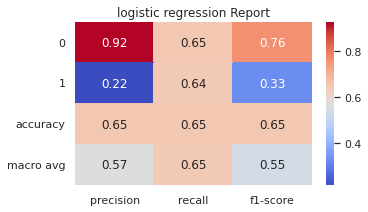

In [ ]:
 # Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'logistic regression Report')

### Feature importance

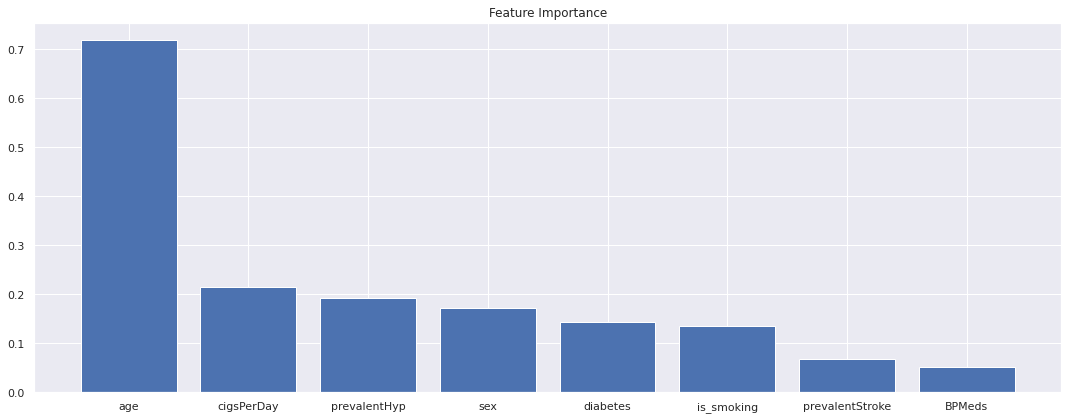

In [ ]:
#for feature importance
try:
    importance = log_reg_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(log_reg_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()    

## 👉 Hyperparameter tunning to choose best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Fitting Logistic Regression Model
log_reg_clf_model= LogisticRegression()
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(estimator =log_reg_clf_model,param_grid=params,cv=10, scoring='roc_auc')

In [ ]:
#training the classifier
logistic_clf.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000, 10000, 100000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',logistic_clf.best_score_,'using',logistic_clf.best_params_)

We can get accuracy of 0.7227555770750236 using {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}


### **Fitting the final model with the best parameters obtained from logistic_clf**

In [ ]:
logistic_clf_model=LogisticRegression(C= 0.01, class_weight= 'balanced', penalty='l2',fit_intercept=True, max_iter=10000)
#training the classifier
logistic_clf_model.fit(X_smote,y_smote)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000)

In [ ]:
#predicting
y_pred = logistic_clf_model.predict(X_test)

## **Classification Evaluation Metrics for logistic regression**


In [ ]:
#for train data
print(f"Using logistic regression we get an accuracy of train set{round(((accuracy_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an precision of train set {round(((precision_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an recall score of train set {round(((recall_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an f1 of train set {round(((f1_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2)}%")

print("\n")
#for test data

print(f"Using logistic regression we get an accuracy of {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")


model_comparison['Logistic Regression']= [round(((accuracy_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2),round(((precision_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2),
                                         round(((recall_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2),round(((f1_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2),round(((roc_auc_score(y_smote, logistic_clf_model.predict(X_smote))))*100,2),"",
                                         round(((accuracy_score(y_test,y_pred)))*100,2),round((precision_score(y_test, y_pred))*100,2),round((recall_score(y_test, y_pred))*100,2),round((f1_score(y_test, y_pred))*100,2),round((roc_auc_score(y_test, y_pred))*100,2)]




Using logistic regression we get an accuracy of train set67.5%
Using logistic regression we get an precision of train set 67.28%
Using logistic regression we get an recall score of train set 68.14%
Using logistic regression we get an f1 of train set 67.71%
Using logistic regression we get an roc_auc_score of train set 67.5%


Using logistic regression we get an accuracy of 65.78%
Using logistic regression we get an precision of test set 22.69%
Using logistic regression we get an recall score of test set 65.56%
Using logistic regression we get an f1 of test set 33.71%
Using logistic regression we get an roc_auc_score of test set 65.69%


### classification_report of logistic model

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       588
           1       0.23      0.66      0.34        90

    accuracy                           0.66       678
   macro avg       0.58      0.66      0.55       678
weighted avg       0.83      0.66      0.71       678





Text(0.5, 1.0, 'logistic regression Report')

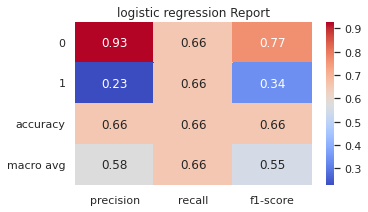

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
print("\n")

# Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'logistic regression Report')

### Confusion metrix

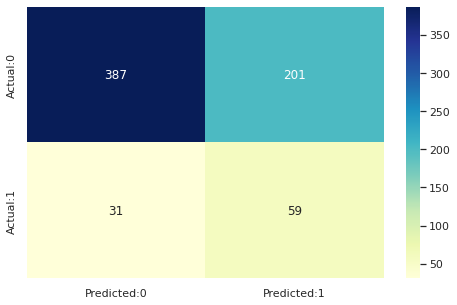

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


### Feature importance

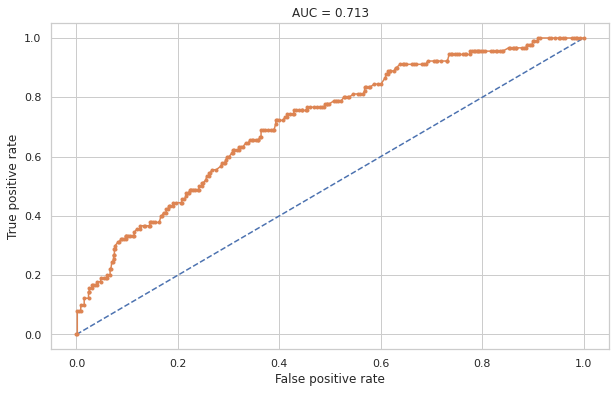

In [ ]:
# ROC curve and AUC
probs =logistic_clf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

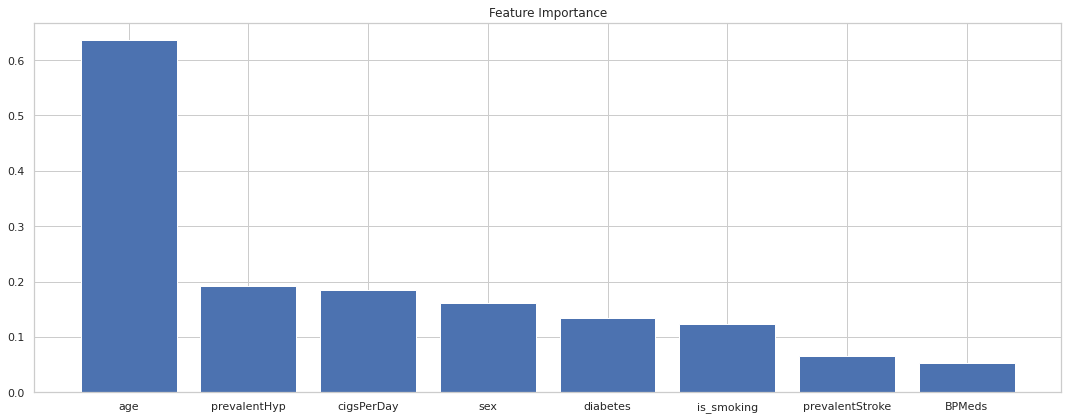

In [ ]:
#for feature importance
try:
    importance = logistic_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(logistic_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()   

In [ ]:
cardio_df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'cardio_risk'],
      dtype='object')

## Decision Tree Model

In [ ]:
#separating dependent and independent features
features=cardio_df.columns
independent_variables=[i for i in features if i not in ["cardio_risk"]]
#independent variables
X=cardio_df[independent_variables]
#dependent variables
y=cardio_df["cardio_risk"]

In [ ]:
#spliting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 3)
print((X_train.shape,  y_train.shape),(y_test.shape,X_test.shape))

((2712, 14), (2712,)) ((678,), (678, 14))


In [ ]:
smote = SMOTE(random_state=42)
#fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 6, 1),
    'min_samples_leaf': range(1, 50, 2),
    'min_samples_split': range(2, 50, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
model_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model_tree, param_grid = param_grid, scoring = 'roc_auc',
                          cv = n_folds, verbose = 1)


In [ ]:

# Fit the grid search to the data
grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 50, 2),
                         'min_samples_split': range(2, 50, 2)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006574      0.000823         0.002639        0.000173   
1       0.006248      0.000124         0.002598        0.000095   
2       0.006250      0.000147         0.002547        0.000046   
3       0.006954      0.001466         0.002577        0.000075   
4       0.007890      0.001818         0.003285        0.000837   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               1                      1   
1         entropy               1                      1   
2         entropy               1                      1   
3         entropy               1                      1   
4         entropy               1                      1   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
1                       4  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
2                       6  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
3                       8  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
4                      10  {'criterion': 'entropy', 'max_depth': 1, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.571274           0.644708           0.665227           0.672506   
1           0.571274           0.644708           0.665227           0.672506   
2           0.571274           0.644708           0.665227           0.672506   
3           0.571274           0.644708           0.665227           0.672506   
4           0.571274           0.644708           0.665227           0.672506   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.668046         0.644352        0.037763             4801  
1           0.668046         0.644352        0.037763             4801  
2           0.668046         0.644352        0.037763             4801  
3           0.668046         0.644352        0.037763             4801  
4           0.668046         0.644352        0.037763             4801

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7697582105411597
DecisionTreeClassifier(max_depth=5, min_samples_leaf=21, min_samples_split=44)


In [ ]:
# model with optimal hyperparameters
tree_clf_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=21, min_samples_split=44)
tree_clf_model.fit(X_smote, y_smote)
y_pred= tree_clf_model.predict(X_test)

## **Classification Evaluation Metrics for Decision Tree**


In [ ]:
#for train data
print(f"Using DecisionTreeClassifier we get an accuracy of train set{round(((accuracy_score(y_smote, tree_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an precision of train set {round(((precision_score(y_smote, tree_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an recall score of train set {round(((recall_score(y_smote, tree_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an f1 of train set {round(((f1_score(y_smote, tree_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, tree_clf_model.predict(X_smote))))*100,2)}%")

print("\n")
#for test data

print(f"Using DecisionTreeClassifier we get an accuracy of test set {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using DecisionTreeClassifier we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")

model_comparison['DecisionTreeClassifier ']= [round(((accuracy_score(y_smote, tree_clf_model.predict(X_smote))))*100,2),round(((precision_score(y_smote, tree_clf_model.predict(X_smote))))*100,2),
                                         round(((recall_score(y_smote, tree_clf_model.predict(X_smote))))*100,2),round(((f1_score(y_smote, tree_clf_model.predict(X_smote))))*100,2),round(((roc_auc_score(y_smote, tree_clf_model.predict(X_smote))))*100,2),"",
                                         round(((accuracy_score(y_test,y_pred)))*100,2),round((precision_score(y_test, y_pred))*100,2),round((recall_score(y_test, y_pred))*100,2),round((f1_score(y_test, y_pred))*100,2),round((roc_auc_score(y_test, y_pred))*100,2)]





Using DecisionTreeClassifier we get an accuracy of train set72.86%
Using DecisionTreeClassifier we get an precision of train set 71.3%
Using DecisionTreeClassifier we get an recall score of train set 76.53%
Using DecisionTreeClassifier we get an f1 of train set 73.82%
Using DecisionTreeClassifier we get an roc_auc_score of train set 72.86%


Using DecisionTreeClassifier we get an accuracy of test set 67.26%
Using DecisionTreeClassifier we get an precision of test set 27.57%
Using DecisionTreeClassifier we get an recall score of test set 59.29%
Using DecisionTreeClassifier we get an f1 of test set 37.64%
Using DecisionTreeClassifier we get an roc_auc_score of test set 64.07%


classification report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       565
           1       0.28      0.59      0.38       113

    accuracy                           0.67       678
   macro avg       0.58      0.64      0.58       678
weighted avg       0.79      0.67      0.71       678






Text(0.5, 1.0, 'decision tree Report')

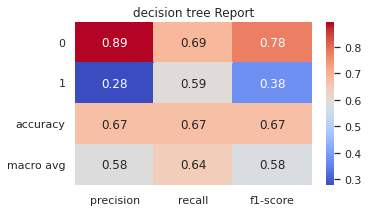

In [ ]:
# print classification report
print("classification report")
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
print("\n\n")

# Classification report

plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'decision tree Report')

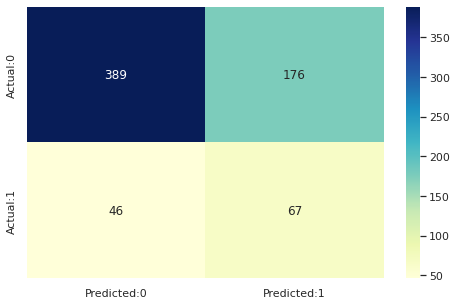

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


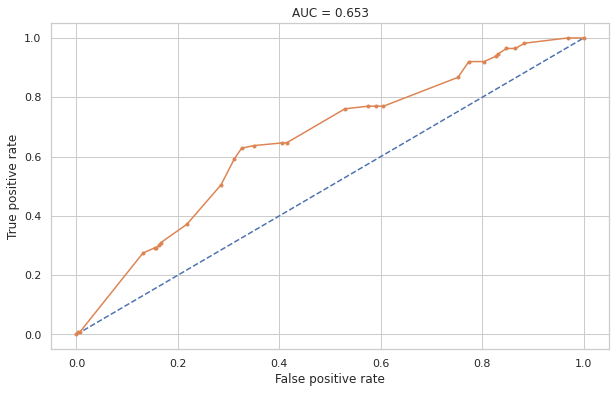

In [ ]:
# ROC curve and AUC
probs =tree_clf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

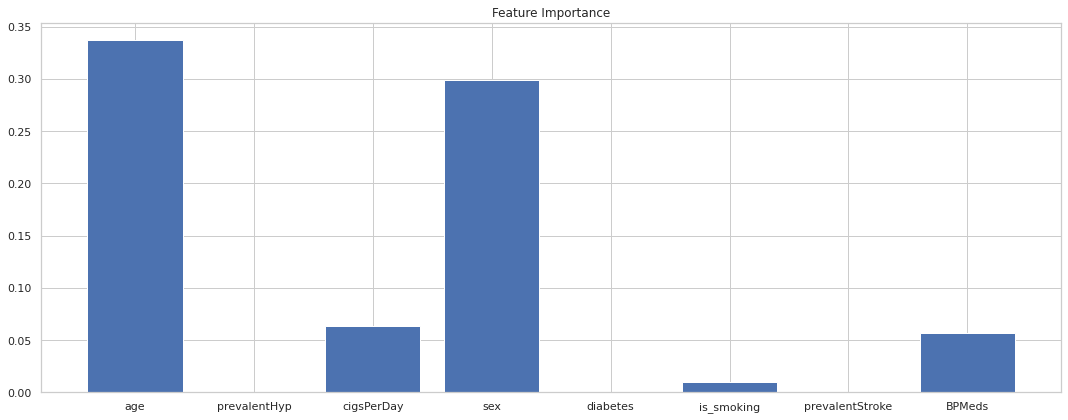

In [ ]:

#for feature importance
try:
    importance = tree_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(tree_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()   


## Random Forest Classifier

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth':range(4, 10, 1),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200,300], 
    'max_features': [2, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=2)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [ ]:
grid_search.fit(X_smote, y_smote)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': range(4, 10), 'max_features': [2, 10],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7806497391190637 using {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


### **Fitting the final model with the best parameters obtained from grid search.**


In [ ]:
#random forest  model with best parameters
random_clf_model = RandomForestClassifier(bootstrap=True,
                                  max_depth= 9, 
                                  max_features = 2,
                                  min_samples_leaf=100,
                                  min_samples_split= 200,
                                  n_estimators=300)

In [ ]:
# fit
random_clf_model.fit(X_smote,y_smote)
# predict
y_pred= random_clf_model.predict(X_test)

## **Classification Evaluation Metrics for Random Forest**


In [ ]:
#for train data
print(f"Using Random forest Classifier we get an accuracy of train set {round(((accuracy_score(y_smote, random_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using Random forest Classifier we get an precision of train set {round(((precision_score(y_smote, random_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using Random forest Classifier we get an recall score of train set {round(((recall_score(y_smote, random_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using Random forest Classifier we get an f1 of train set {round(((f1_score(y_smote, random_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using Random forest Classifier we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, random_clf_model.predict(X_smote))))*100,2)}%")

print("\n")
#for test data

print(f"Using Random forest Classifier we get an accuracy of test set {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using Random forest Classifier we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using Random forest Classifier we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using Random forest Classifier we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using Random forest Classifier we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")




model_comparison['RandomforestClassifier ']= [round(((accuracy_score(y_smote, random_clf_model.predict(X_smote))))*100,2),round(((precision_score(y_smote, random_clf_model.predict(X_smote))))*100,2),
                                         round(((recall_score(y_smote, random_clf_model.predict(X_smote))))*100,2),round(((f1_score(y_smote, random_clf_model.predict(X_smote))))*100,2),round(((roc_auc_score(y_smote, random_clf_model.predict(X_smote))))*100,2),"",
                                         round(((accuracy_score(y_test,y_pred)))*100,2),round((precision_score(y_test, y_pred))*100,2),round((recall_score(y_test, y_pred))*100,2),round((f1_score(y_test, y_pred))*100,2),round((roc_auc_score(y_test, y_pred))*100,2)]




Using Random forest Classifier we get an accuracy of train set 74.55%
Using Random forest Classifier we get an precision of train set 74.76%
Using Random forest Classifier we get an recall score of train set 74.11%
Using Random forest Classifier we get an f1 of train set 74.44%
Using Random forest Classifier we get an roc_auc_score of train set 74.55%


Using Random forest Classifier we get an accuracy of test set 69.76%
Using Random forest Classifier we get an precision of test set 28.1%
Using Random forest Classifier we get an recall score of test set 52.21%
Using Random forest Classifier we get an f1 of test set 36.53%
Using Random forest Classifier we get an roc_auc_score of test set 62.74%


              precision    recall  f1-score   support

           0       0.88      0.73      0.80       565
           1       0.28      0.52      0.37       113

    accuracy                           0.70       678
   macro avg       0.58      0.63      0.58       678
weighted avg       0.78      0.70      0.73       678





Text(0.5, 1.0, 'Random forest Report')

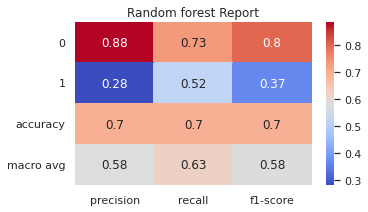

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
print("\n")

# Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'Random forest Report')

#### confusion metric

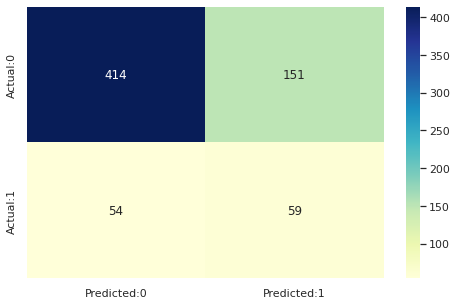

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### ROC curve

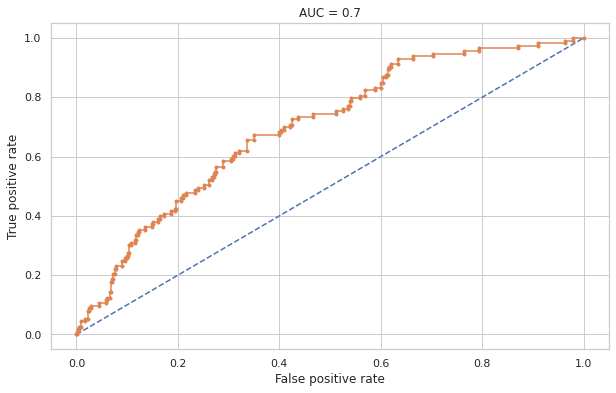

In [ ]:

# ROC curve and AUC
probs =random_clf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
random_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(random_auc,3)}")
plt.show()

#feature importance

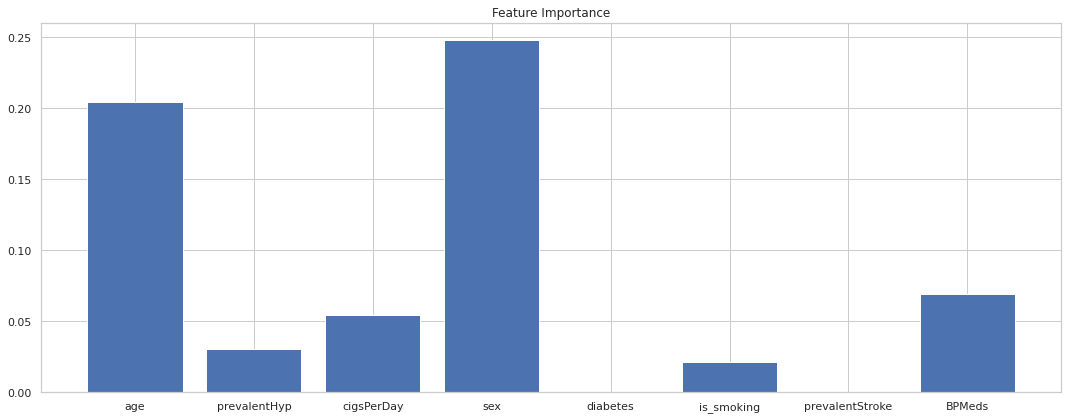

In [ ]:
#for feature importance
try:
    importance = random_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(random_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()   

## XGBRFClassifier

In [ ]:
# Classifier
Xgb_clf_model = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(Xgb_clf_model, param_grid = grid, scoring = 'roc_auc', cv=5)

In [ ]:
#training
xgb.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=XGBRFClassifier(random_state=3, silent=True),
             param_grid={'eta': [0.05, 0.08, 0.1], 'max_depth': [8, 10],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [150]},
             scoring='roc_auc')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best roc_score", xgb.best_score_)
print(xgb.best_estimator_)

best roc_score 0.8892225605486385
XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)


### Fitting the final model with the best parameters obtained from grid search.

In [ ]:
#XGB Classifier model with best parameters
XGB_clf_model = XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,min_samples_split=50, n_estimators=150, random_state=3,silent=True)

In [ ]:
# fit
XGB_clf_model.fit(X_smote,y_smote)
# predict
y_pred= XGB_clf_model.predict(X_test)

### XGB classifier evaluation metric


In [ ]:
#for train data
print(f"Using XGB classifier we get an accuracy of train set{round(((accuracy_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using XGB classifier we get an precision of train set {round(((precision_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using XGB classifier we get an recall score of train set {round(((recall_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using XGB Classifier we get an f1 of train set {round(((f1_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using XGB Classifier we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2)}%")

print("\n")
#for test data

print(f"Using XGB Classifier we get an accuracy of test set {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using XGB Classifier we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using XGB Classifier we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using XGB Classifier we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using XGB Classifier we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")




model_comparison['XGBClassifier ']= [round(((accuracy_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2),round(((precision_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2),
                                         round(((recall_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2),round(((f1_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2),round(((roc_auc_score(y_smote, XGB_clf_model.predict(X_smote))))*100,2),"",
                                         round(((accuracy_score(y_test,y_pred)))*100,2),round((precision_score(y_test, y_pred))*100,2),round((recall_score(y_test, y_pred))*100,2),round((f1_score(y_test, y_pred))*100,2),round((roc_auc_score(y_test, y_pred))*100,2)]




Using XGB classifier we get an accuracy of train set91.66%
Using XGB classifier we get an precision of train set 89.44%
Using XGB classifier we get an recall score of train set 94.47%
Using XGB Classifier we get an f1 of train set 91.89%
Using XGB Classifier we get an roc_auc_score of train set 91.66%


Using XGB Classifier we get an accuracy of test set 72.71%
Using XGB Classifier we get an precision of test set 26.62%
Using XGB Classifier we get an recall score of test set 36.28%
Using XGB Classifier we get an f1 of test set 30.71%
Using XGB Classifier we get an roc_auc_score of test set 58.14%


              precision    recall  f1-score   support

           0       0.86      0.80      0.83       565
           1       0.27      0.36      0.31       113

    accuracy                           0.73       678
   macro avg       0.56      0.58      0.57       678
weighted avg       0.76      0.73      0.74       678





Text(0.5, 1.0, 'XGB Report')

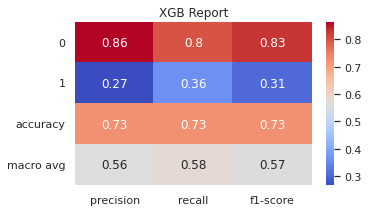

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
print("\n")

# Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'XGB Report')


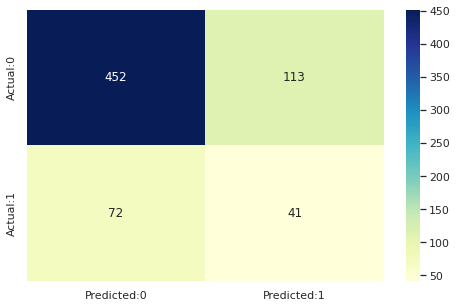

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

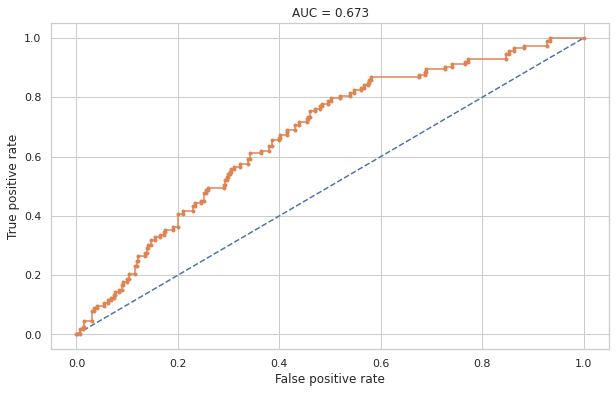

In [ ]:
# ROC curve and AUC
probs =XGB_clf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(XGB_auc,3)}")
plt.show()


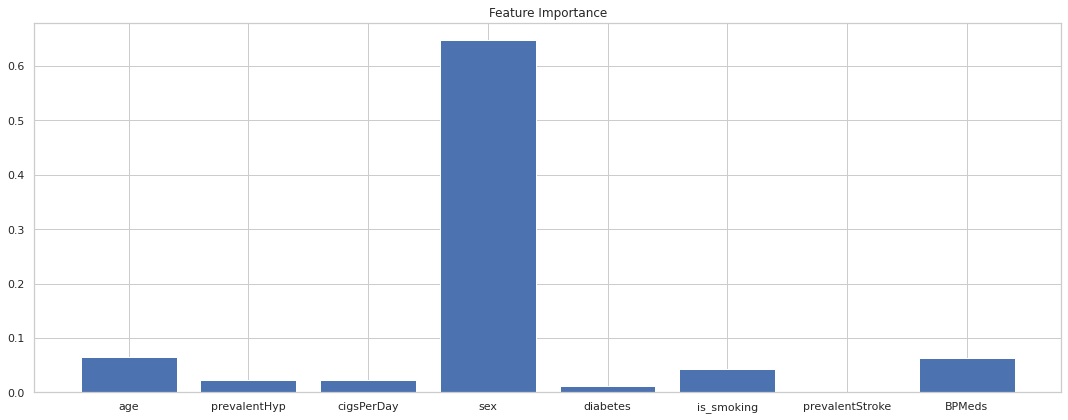

In [ ]:

#for feature importance
try:
    importance = XGB_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(XGB_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()   



##Support vector machine

In [ ]:
# SVM algorithm
svm_clf_model = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc_search = GridSearchCV(svm_clf_model, param_grid = grid, cv=5)


In [ ]:
#fit
svc_search.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]})

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best roc_score", svc_search.best_score_)
print(svc_search.best_estimator_)

best roc_score 0.6026391921078746
SVC(C=0.1, kernel='poly', max_iter=1000, probability=True, random_state=0)


In [ ]:
#XGB Classifier model with best parameters
svc_clf_model = SVC(C=0.1, kernel='poly', max_iter=1000, probability=True, random_state=0)

In [ ]:
# fit
svc_clf_model.fit(X_smote,y_smote)
# predict
y_pred= svc_clf_model.predict(X_test)

### Evaluation metric for SVM

In [ ]:
#for train data
print(f"Using SVM classifier we get an accuracy of train set{round(((accuracy_score(y_smote, svc_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using SVM classifier we get an precision of train set {round(((precision_score(y_smote, svc_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using SVM classifier we get an recall score of train set {round(((recall_score(y_smote, svc_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using SVM Classifier we get an f1 of train set {round(((f1_score(y_smote, svc_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using SVM Classifier we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, svc_clf_model.predict(X_smote))))*100,2)}%")

print("\n")
#for test data

print(f"Using SVM Classifier we get an accuracy of test set {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using SVM Classifier we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using SVM Classifier we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using SVM Classifier we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using SVM Classifier we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")




model_comparison['SVMClassifier ']= [round(((accuracy_score(y_smote, svc_clf_model.predict(X_smote))))*100,2),round(((precision_score(y_smote, svc_clf_model.predict(X_smote))))*100,2),
                                         round(((recall_score(y_smote, svc_clf_model.predict(X_smote))))*100,2),round(((f1_score(y_smote, svc_clf_model.predict(X_smote))))*100,2),round(((roc_auc_score(y_smote, svc_clf_model.predict(X_smote))))*100,2),"",
                                         round(((accuracy_score(y_test,y_pred)))*100,2),round((precision_score(y_test, y_pred))*100,2),round((recall_score(y_test, y_pred))*100,2),round((f1_score(y_test, y_pred))*100,2),round((roc_auc_score(y_test, y_pred))*100,2)]




Using SVM classifier we get an accuracy of train set50.5%
Using SVM classifier we get an precision of train set 50.26%
Using SVM classifier we get an recall score of train set 95.03%
Using SVM Classifier we get an f1 of train set 65.75%
Using SVM Classifier we get an roc_auc_score of train set 50.5%


Using SVM Classifier we get an accuracy of test set 19.62%
Using SVM Classifier we get an precision of test set 15.82%
Using SVM Classifier we get an recall score of test set 88.5%
Using SVM Classifier we get an f1 of test set 26.85%
Using SVM Classifier we get an roc_auc_score of test set 47.17%


              precision    recall  f1-score   support

           0       0.72      0.06      0.11       565
           1       0.16      0.88      0.27       113

    accuracy                           0.20       678
   macro avg       0.44      0.47      0.19       678
weighted avg       0.62      0.20      0.13       678





Text(0.5, 1.0, 'XGB Report')

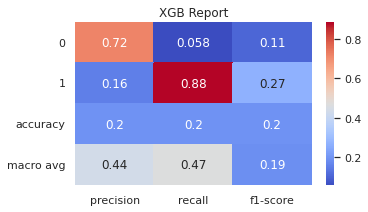

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))
print("\n")

# Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'XGB Report')

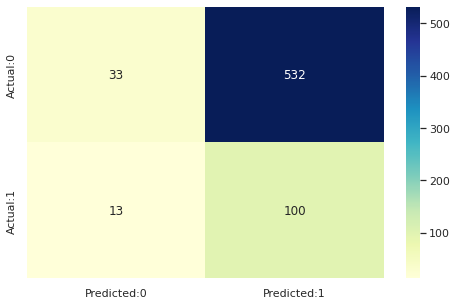

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

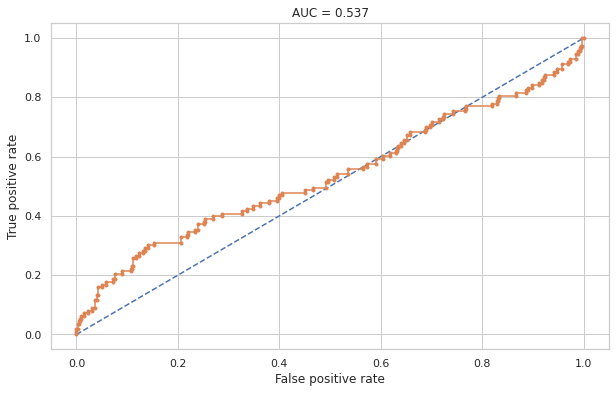

In [ ]:
# ROC curve and AUC
probs =svc_clf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svc_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()


## Model comparison

In [ ]:
Model_comparision=pd.DataFrame(model_comparison).T
Model_comparision.columns=['accuracy_score_train_set',"precision_score_train_set","recall_score_train_set","f1_score_train_set","roc_auc_score_train_set","-------","accuracy_score_test_set","precision_score_test_set","recall_score_test_set","f1_score_test_set","roc_auc_score_test_set"]

In [ ]:
Model_comparision[["recall_score_train_set","recall_score_test_set"]]

recall_score_train_set recall_score_test_set
Logistic Regression                      68.14                 65.56
DecisionTreeClassifier                   76.53                 59.29
RandomforestClassifier                   74.11                 52.21
XGBClassifier                            94.47                 36.28
SVMClassifier                            95.03                  88.5